# MiniProject 1: Storage capacity in biologically plausible Hopfield networks #

## Ex 3. Separate inhibitory population ##

Let's study the capacity of a Hopfield network with stochastic binary neurons and low-activity patterns with the following model:
This model is proposed in the paper by [Tsodyks and Feigel’man (1988)] and discussed briefly in Chapter 17.2.6 of the book Neuronal Dynamics.
Given a neuron’s continuous state $S_i(t) = [-1, 1]$, we define the binary, stochastic spike variable $\sigma_i(t) = \{0, 1\}$ as: 
$$
P \{ \sigma_i(t) = +1 | S_i(t) \} = \frac{1}{2} (S_i(t) + 1)
$$
where $\sigma_i = 1$ can be interpreted as a spike and $\sigma_i = 0$ as the quiescent state of the neuron. The states update according to: 
$$
S_i(t + 1) = \phi \left( \sum_{j=1}^N w_{ij} \sigma_j(t) - \theta \right)
$$
where $\phi (h) = \text{tanh}(4h)$ and the constant $\theta$ is the neuronal "firing threshold". Synaptic weights are set according to: 
$$
w_{ij} = \frac{c}{N} \sum_{\mu = 1}^M (\xi_i^\mu - b) (\xi_j^\mu -a)
$$
where $c = \frac{2}{a(1-a)}$, and $a$, $b$ are constants in the $[0, 1]$ interval. Here, each component $\xi_i^{\mu} \in \{ 0, 1 \}$ of the patterns has a probability $a$ of being 1, which we call the activity (or sparseness). Therefore, $a$ is the mean activity of the patterns.

**Ex 3. Separate inhibitory population**

In a more biologically plausible model, the outgoing synapses from a given neuron cannot be both inhibitory and excitatory (that is, negative and positive): this is the Dale’s law, stating that each neuron should be either inhibitory or excitatory (with negative or positive outgoing weights). In this section, we see how a Hopfield network can include separate inhibitory and excitatory populations. We continue working with the same binary stochastic spike variables $\sigma_i(t)$, and with random patterns $\xi_i^{\mu} \in \{ 0, 1 \}$ with a mean activity of $a$. Patterns are stored in a population of excitatory neurons that receive negative feedback from an inhibitory population. The synaptic weight from excitatory neuron $j$ to excitatory neuron $i$ is given by: 
$$
W^{E \leftarrow E}_{ij} = \frac{c}{N} \sum_{\mu} \xi_i^{\mu} \xi_j^{\mu}
$$
The inhibitory population is composed of $N_I$ neurons. Each inhibitory neuron $k$ receives input from $\textbf{exactly}$ $K$ excitatory neurons, selected at random in the excitatory population, with synaptic strength 
$$
W^{I \leftarrow E}_{ki} = \frac{1}{K}
$$
Each excitatory neuron $i$ receives $\textit{negative}$ input from inhibitory neuron $k$ with weight: 
$$
W^{E \leftarrow I}_{ik} = \frac{ca}{N_I} \sum_{\mu} \xi_i^{\mu}
$$
Finally, we assume that inhibitory neurons have a linear gain function: their state is a stochastic spike variable $\sigma_k^I \in \{ 0, 1 \}$, that updates according to:
$$
P \{ \sigma_k^I(t + 1) = 1 | h_k^I(t) \} = h_k^I(t)
$$
where $h_k^I$ is the input received by inhibitory neuron $k$. Excitatory neurons update with this dynamic, where 
$$
S_i(t) = \phi(h_i(t) - \theta)
$$
and $h_i$ is the total (excitatory and inhibitory) input received by excitatory neuron $i$.

## Ex 3.1

To write down the total input to an excitatory and an inhibitory neuron, we need to consider the contributions from both populations:

**Total input to an excitatory neuron i:**
$$
h_i(t) = \sum_{j=1}^{N} W_{ij}^{E \leftarrow E} \sigma_j(t) - \sum_{k=1}^{N_I} W_{ik}^{E \leftarrow I} \sigma_k^I(t)
$$
where:
- $W_{ij}^{E \leftarrow E} = \frac{c}{N} \sum_{\mu} \xi_i^{\mu} \xi_j^{\mu}$
- $W_{ik}^{E \leftarrow I} = \frac{ca}{N_I} \sum_{\mu} \xi_i^{\mu}$
- $\sigma_j(t)$ is the stochastic binary spike variable of excitatory neuron $j$ at time $t$
- $\sigma_k^I(t)$ is the stochastic binary spike variable of inhibitory neuron $k$ at time $t$

**Total input to an inhibitory neuron k:**
$$
h_k^I(t) = \sum_{i \in \mathcal{K}(k)} W_{ik}^{I \leftarrow E} \sigma_i(t)
$$
where:
- $\mathcal{K}(k)$ denotes the set of $K$ excitatory neurons that project to inhibitory neuron $k$
- $W_{ik}^{I \leftarrow E} = \frac{1}{K}$
- $\sigma_i(t)$ is the stochastic binary spike variable of excitatory neuron $i$ at time $t$

Since the model adheres to Dale's law and the problem statement does not specify any inhibitory-to-inhibitory neuron connections, we can reasonably assume that $W_{ij}^{I \leftarrow I}$ is not defined and effectively zero in this context. In other words, there are no direct inhibitory-to-inhibitory neuron connections in the model described. Thus:
$$
W_{ij}^{I \leftarrow I} = 0
$$
This assumption aligns with the biological plausibility imposed by Dale's law, where each neuron either solely excites or solely inhibits but does not form connections of both types.

### Average Input to an Excitatory Neuron

Next, we will show that the average input to an excitatory neuron is equivalent to the input to a neuron in the model of Exercise 2, for $b = 0$.

First, consider the average input from excitatory neurons to excitatory neuron $i$:
$$
\left\langle \sum_{j=1}^N W_{ij}^{E \leftarrow E} \sigma_j(t) \right\rangle = \left\langle \sum_{j=1}^N \frac{c}{N} \sum_{\mu=1}^M \xi_i^{\mu} \xi_j^{\mu} \sigma_j(t) \right\rangle
$$
Since $\langle \sigma_j(t) \rangle = a$, where $a$ is the mean activity:
$$
= \frac{c}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N \xi_j^{\mu} \langle \sigma_j(t) \rangle
$$
$$
= \frac{c}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N \xi_j^{\mu} a
$$
$$
= \frac{ca}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N \xi_j^{\mu}
$$

Now, consider the average input from inhibitory neurons to excitatory neuron $i$:
$$
\left\langle \sum_{k=1}^{N_I} W_{ik}^{E \leftarrow I} \sigma_k^I(t) \right\rangle = \left\langle \sum_{k=1}^{N_I} \frac{ca}{N_I} \sum_{\mu=1}^M \xi_i^{\mu} \sigma_k^I(t) \right\rangle
$$
Using the fact that $\langle \sigma_k^I(t) \rangle \approx \left\langle h_k^I(t) \right\rangle \approx K \cdot \frac{1}{K} \cdot a$, and approximating:
$$
= \frac{ca}{N_I} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{k=1}^{N_I} \langle \sigma_k^I(t) \rangle
$$
$$
= \frac{ca}{N_I} \sum_{\mu=1}^M \xi_i^{\mu} N_I a
$$
Dividing and multiplying by N:
$$
= \frac{ca}{N} \sum_{\mu=1}^M \xi_i^{\mu} N a
$$
$$
= \frac{ca}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N a
$$

Combining both inputs:
$$
\left\langle h_i(t) \right\rangle = \frac{ca}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N \xi_j^{\mu} - \frac{ca}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N a = \frac{ca}{N} \sum_{\mu=1}^M \xi_i^{\mu} \sum_{j=1}^N \left( \xi_j^{\mu} - a \right)
$$
Thus, the average input to an excitatory neuron in this model is equivalent to the input to a neuron in the model of Exercise 2 for $b = 0$ with $c = \frac{2}{a^2 (1-a)}$

## Ex 3.2

### Total input to excitatory neuron with overlap

$$
\sum_{j=N_I + 1}^N W_{ij}^{E \leftarrow E} \sigma_j(t) = \sum_{j=N_I + 1}^N \frac{c}{N} \sum_{\mu=1}^M \xi_i^{\mu} \xi_j^{\mu} \sigma_j(t) = \sum_{\mu=1}^M \xi_i^{\mu} \frac{c}{N} \sum_{j=N_I + 1}^N \xi_j^{\mu} \sigma_j(t) = \sum_{\mu=1}^M \xi_i^{\mu} m^{\mu}_{E \leftarrow E}
$$
$$
\sum_{k=1}^{N_I} W_{ik}^{E \leftarrow I} \sigma_k^I(t) = \sum_{k=1}^{N_I} \frac{ca}{N_I} \sum_{\mu=1}^M \xi_i^{\mu} \sigma_k^I(t) = ca \sum_{\mu=1}^M \xi_i^{\mu} \left( \frac{1}{N_I} \sum_{k=1}^{N_I} \sigma_k^I(t) \right)
$$

So, $h_i(t)$ and $h_k^I(t)$ can be computed as such:
$$
h_i(t) = \sum_{\mu=1}^M \xi_i^{\mu} \left[ m^{\mu}_{E \leftarrow E} - ca \left( \frac{1}{N_I} \sum_{k=1}^{N_I} \sigma_k^I(t) \right) \right]
$$
$$
h_k^I(t) = \sum_{i \in \mathcal{K}(k)} W_{ki}^{I \leftarrow E} \sigma_i(t) = \sum_{i \in \mathcal{K}(k)} \frac{1}{K} \sigma_i(t)
$$

In [2]:
from importlib import reload
import helper_functions
import helper_functions_ex3
import helper_functions_ex3_states
reload(helper_functions)
reload(helper_functions_ex3)
reload(helper_functions_ex3_states)

<module 'helper_functions_ex3_states' from '/Users/msaillen/Desktop/Travail/EPFL/Neuronal Dynamics/Mini-project-NX/helper_functions_ex3_states.py'>

In [3]:
# We now set the mean pattern activity to a = 0.1, the threshold to θ = 1, the size of the populations to N = 300 and NI = 80, and K = 60.

cst = {
    "N": 300 + 80,            # Number of neurons
    "N_I": 80,                # Number of inhibitory neurons
    "K": 60,                  # Number of excitatory neurons from which each inhibitory neuron receives an input
    "a": 0.1,                 # Mean pattern activity
    "theta": 1,               # Threshold
    "M": 5,                   # Number of patterns
    "beta": 4,                # The temperature
    "T": 8,                   # Number of steps
    "nr_flips": 5,            # Number of flips
    "T_f": 50,                # Number of steps for the final state
    "c_f": 0.05,              # The percentage of flipped bits for the final state
}

cst["nr_flips_f"] = int(cst["c_f"] * cst["N"]) # Number of flips for the final state

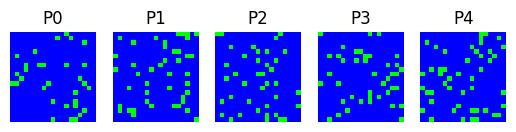

In [4]:
from helper_functions_ex3 import generate_random_patterns, flip_and_iterate
from neurodynex3.hopfield_network import plot_tools

weights, pattern_list, shape = generate_random_patterns(cst)
plot_tools.plot_pattern_list(pattern_list)
noisy_init_pattern_sync, sigmas_list_sync, sigmas_list_as_patterns_sync = flip_and_iterate(cst, shape, pattern_list)
noisy_init_pattern_seq, sigmas_list_seq, sigmas_list_as_patterns_seq = flip_and_iterate(cst, shape, pattern_list, function_name="seq")

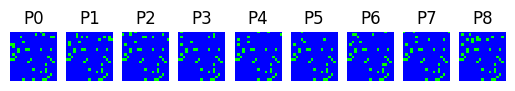

[array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0

In [5]:
plot_tools.plot_pattern_list(sigmas_list_as_patterns_sync)
print(sigmas_list_as_patterns_sync)

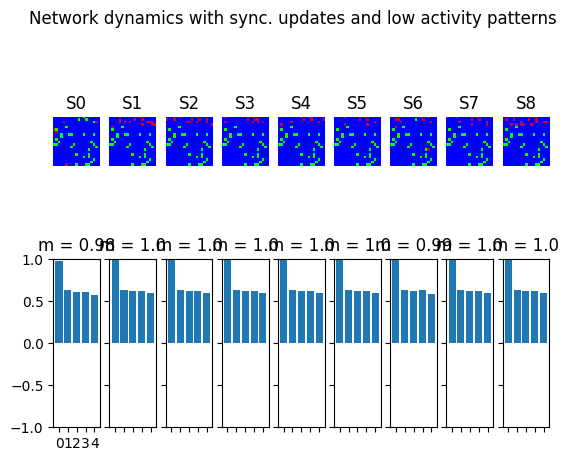

With 8 steps, the network converged to the stored pattern 0.
The overlap is 1.0


In [6]:
from helper_functions_ex3 import plot_state_sequence_and_overlap, study_overlap

plot_state_sequence_and_overlap(sigmas_list_as_patterns_sync, pattern_list, overlap_from=cst["N_I"], suptitle="Network dynamics with sync. updates and low activity patterns")

overlap = study_overlap(cst, sigmas_list_as_patterns_sync, pattern_list, overlap_from=cst["N_I"], pattern_init=0)

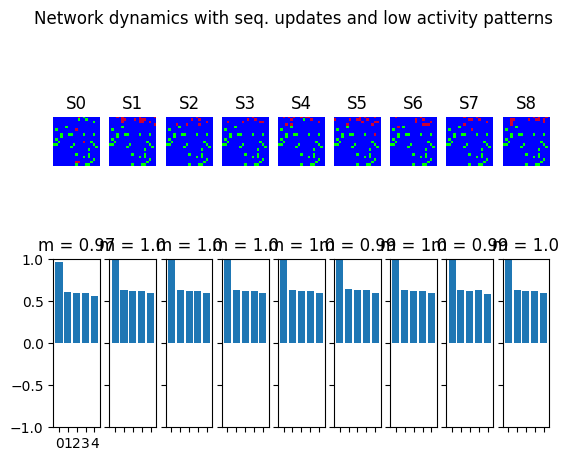

With 8 steps, the network converged to the stored pattern 0.
The overlap is 1.0


In [7]:
from helper_functions_ex3 import study_overlap, plot_state_sequence_and_overlap

plot_state_sequence_and_overlap(sigmas_list_as_patterns_seq, pattern_list, overlap_from=cst["N_I"], reference_idx=0, suptitle="Network dynamics with seq. updates and low activity patterns")

overlap = study_overlap(cst, sigmas_list_as_patterns_seq, pattern_list, overlap_from=cst["N_I"], pattern_init=0)

## Ex 3.3 Storage capacity study

For different network sizes $N$ from 50 to 800, plot the number of retrieved patterns per dictionary divided by $N$ as a function of the loading $L$.

How does the capacity depend on the network size? Is this what you would expect?

Hint: select a range of $4-5$ loadings $L = \frac{M}{N}$ close to the capacity you found for $N = 300$.

For each network size $N$ and loading $L$, compute the mean and std of the number of retrieved patterns across $5-10$ initialisations of the dictionary to get a plot (with the errorbars).

The capacity corresponds to the average number of retrieved patterns $M_{max}$ that you obtain for an optimal loading $L$, divided by $N$.

In [8]:
# Study the storage capacity, by plotting the mean number of retrieved patterns per dictionary as a
# function of the loading L = M/N (as in question 1.7). Compare the synchronous and sequential updates.
# Does one perform better? How does it compare to the model of exercise 2 with the same parameters?

>> Computing M=5 value for N=380
>> Computing M=6 value for N=380
>> Computing M=7 value for N=380
>> Computing M=8 value for N=380
>> Computing M=9 value for N=380
>> Computing M=10 value for N=380
>> Computing M=11 value for N=380
>> Computing M=12 value for N=380
>> Computing M=13 value for N=380
>> Computing M=14 value for N=380
>> Computing M=15 value for N=380
>> Computing M=16 value for N=380
>> Computing M=17 value for N=380
>> Computing M=18 value for N=380
>> Computing M=19 value for N=380
>> Computing M=20 value for N=380
>> Computing M=21 value for N=380
>> Computing M=22 value for N=380
>> Computing M=23 value for N=380
>> Computing M=24 value for N=380


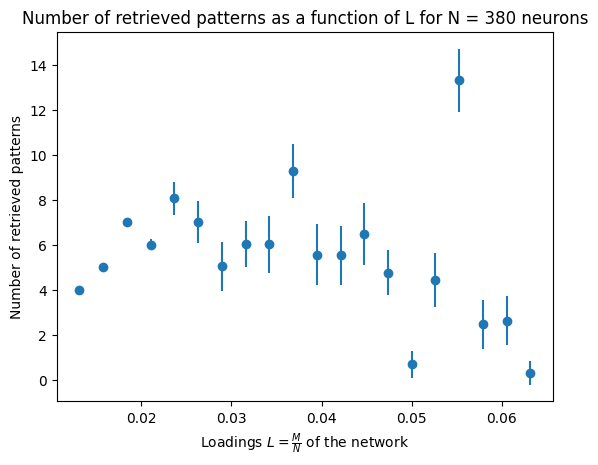

In [9]:
import numpy as np
from helper_functions_ex3 import study_simple_capacity

# Find the capacity for N = 300 as in question 1.6

cst["N"] = 300 + 80
cst["nr_flips"] = int(0.05 * cst["N"])
cst["c_f"] = 0.05                           
cst["T"] = 50
cst["nr_iter"] = 100
M_values = np.arange(5, 25, 1)

capacity = study_simple_capacity(cst, M_values, function_name="sync")

In [10]:
print(capacity) # Estimation of the capacity from N = 300 neurons, 5% of flipped bits, 50 steps and 100 iterations

0.04473684210526316


> Computing capacity for N = 50, N_I = 10 and K = 7...
>> Computing M=1 value for N=50
>> Computing M=2 value for N=50
>> Computing M=3 value for N=50
>> Computing M=4 value for N=50


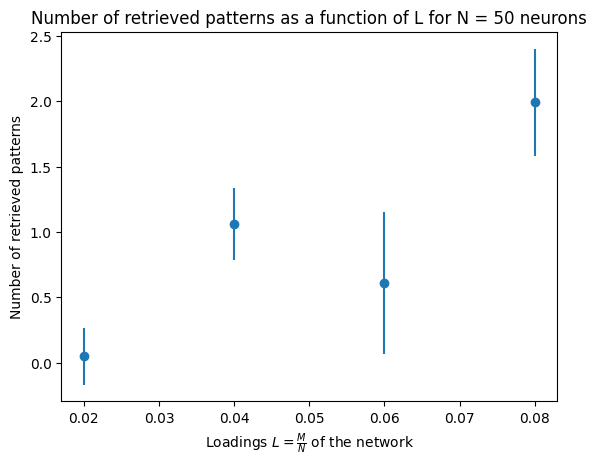

> Computing capacity for N = 100, N_I = 21 and K = 15...
>> Computing M=1 value for N=100
>> Computing M=3 value for N=100
>> Computing M=5 value for N=100
>> Computing M=7 value for N=100


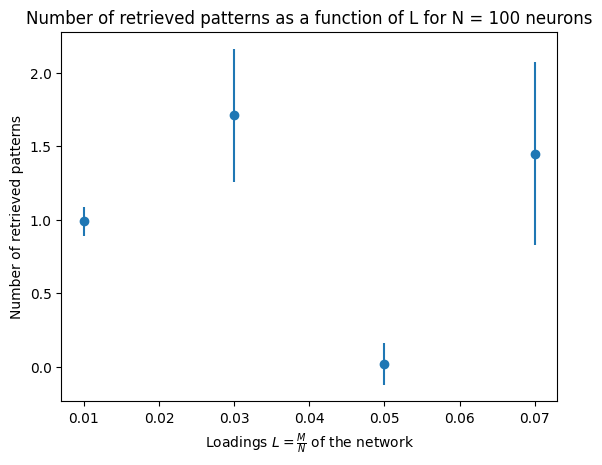

> Computing capacity for N = 150, N_I = 31 and K = 23...
>> Computing M=1 value for N=150
>> Computing M=3 value for N=150
>> Computing M=5 value for N=150
>> Computing M=7 value for N=150
>> Computing M=9 value for N=150
>> Computing M=11 value for N=150
>> Computing M=13 value for N=150


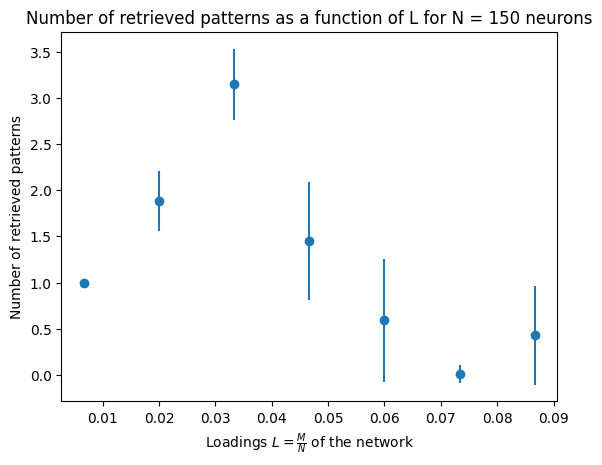

> Computing capacity for N = 200, N_I = 42 and K = 31...
>> Computing M=2 value for N=200
>> Computing M=5 value for N=200
>> Computing M=8 value for N=200
>> Computing M=11 value for N=200
>> Computing M=14 value for N=200
>> Computing M=17 value for N=200


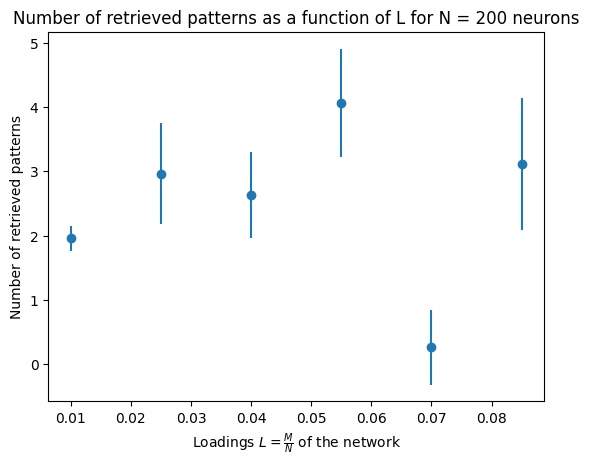

> Computing capacity for N = 250, N_I = 52 and K = 39...
>> Computing M=3 value for N=250
>> Computing M=7 value for N=250
>> Computing M=11 value for N=250
>> Computing M=15 value for N=250
>> Computing M=19 value for N=250
>> Computing M=23 value for N=250


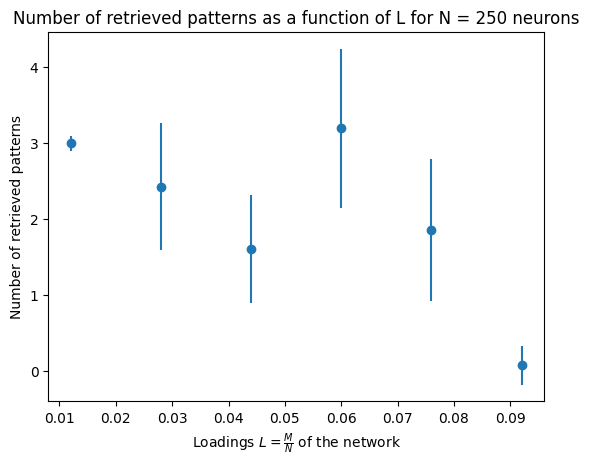

> Computing capacity for N = 300, N_I = 63 and K = 47...
>> Computing M=3 value for N=300
>> Computing M=8 value for N=300
>> Computing M=13 value for N=300
>> Computing M=18 value for N=300
>> Computing M=23 value for N=300


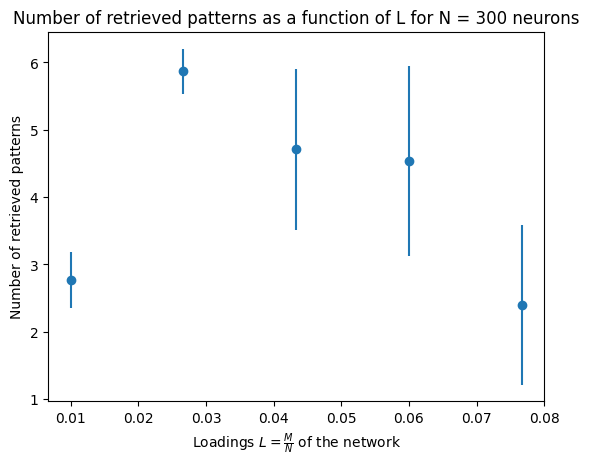

> Computing capacity for N = 350, N_I = 73 and K = 55...
>> Computing M=4 value for N=350
>> Computing M=10 value for N=350
>> Computing M=16 value for N=350
>> Computing M=22 value for N=350
>> Computing M=28 value for N=350


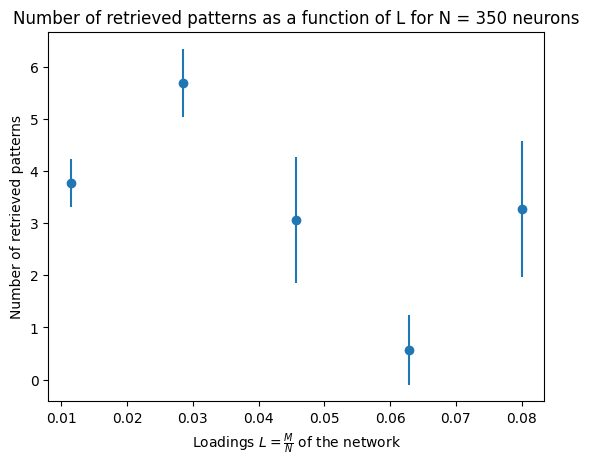

> Computing capacity for N = 400, N_I = 84 and K = 63...
>> Computing M=5 value for N=400
>> Computing M=12 value for N=400
>> Computing M=19 value for N=400
>> Computing M=26 value for N=400
>> Computing M=33 value for N=400


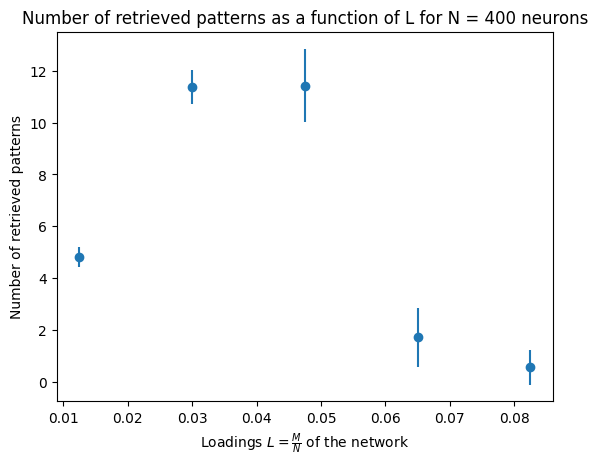

> Computing capacity for N = 450, N_I = 94 and K = 71...
>> Computing M=6 value for N=450
>> Computing M=14 value for N=450
>> Computing M=22 value for N=450
>> Computing M=30 value for N=450
>> Computing M=38 value for N=450


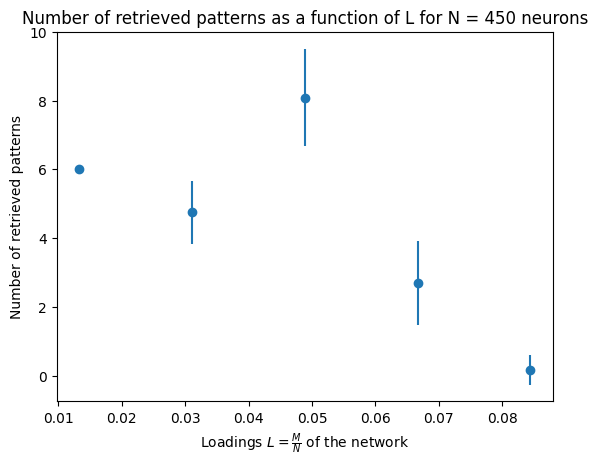

> Computing capacity for N = 500, N_I = 105 and K = 78...
>> Computing M=5 value for N=500
>> Computing M=13 value for N=500
>> Computing M=21 value for N=500
>> Computing M=29 value for N=500
>> Computing M=37 value for N=500
>> Computing M=45 value for N=500


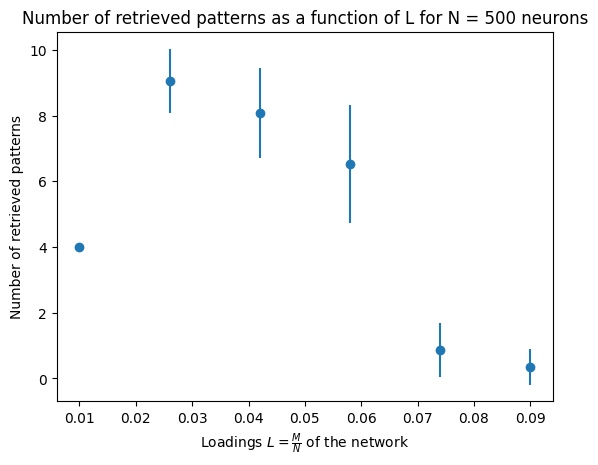

> Computing capacity for N = 550, N_I = 115 and K = 86...
>> Computing M=6 value for N=550
>> Computing M=15 value for N=550
>> Computing M=24 value for N=550
>> Computing M=33 value for N=550
>> Computing M=42 value for N=550
>> Computing M=51 value for N=550


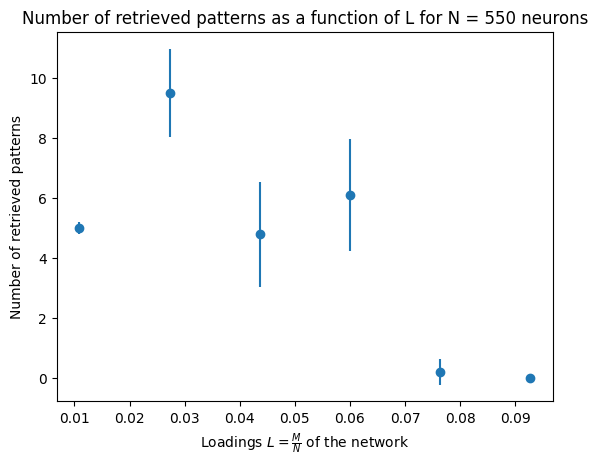

> Computing capacity for N = 600, N_I = 126 and K = 94...
>> Computing M=7 value for N=600
>> Computing M=17 value for N=600
>> Computing M=27 value for N=600
>> Computing M=37 value for N=600
>> Computing M=47 value for N=600


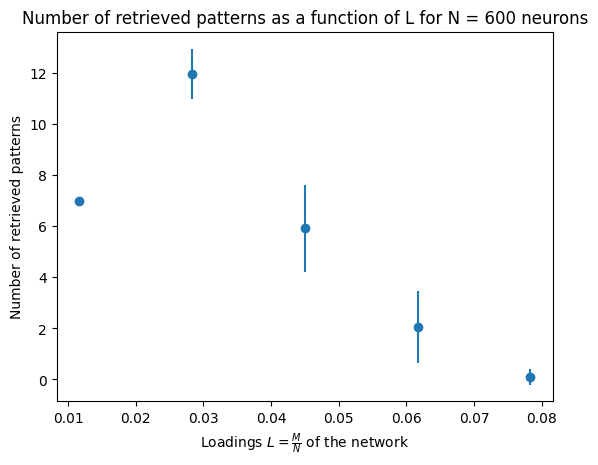

> Computing capacity for N = 650, N_I = 136 and K = 102...
>> Computing M=8 value for N=650
>> Computing M=19 value for N=650
>> Computing M=30 value for N=650
>> Computing M=41 value for N=650
>> Computing M=52 value for N=650


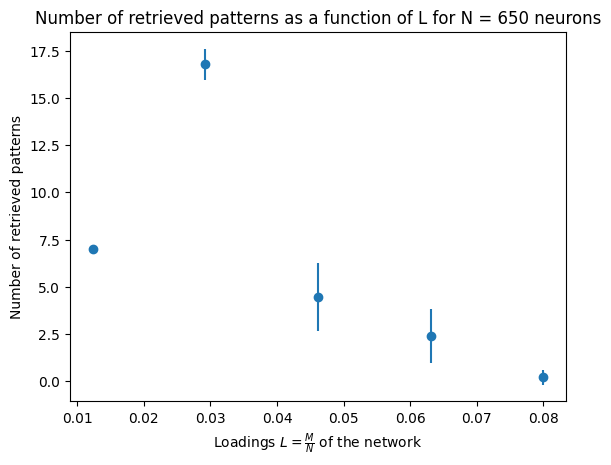

> Computing capacity for N = 700, N_I = 147 and K = 110...
>> Computing M=8 value for N=700
>> Computing M=20 value for N=700
>> Computing M=32 value for N=700
>> Computing M=44 value for N=700
>> Computing M=56 value for N=700


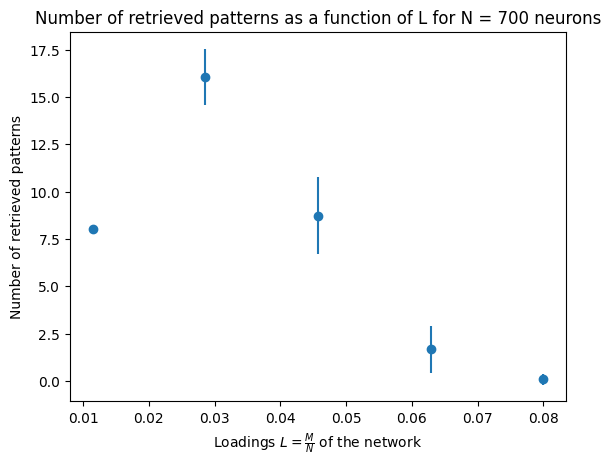

> Computing capacity for N = 750, N_I = 157 and K = 118...
>> Computing M=8 value for N=750
>> Computing M=20 value for N=750
>> Computing M=32 value for N=750
>> Computing M=44 value for N=750
>> Computing M=56 value for N=750
>> Computing M=68 value for N=750


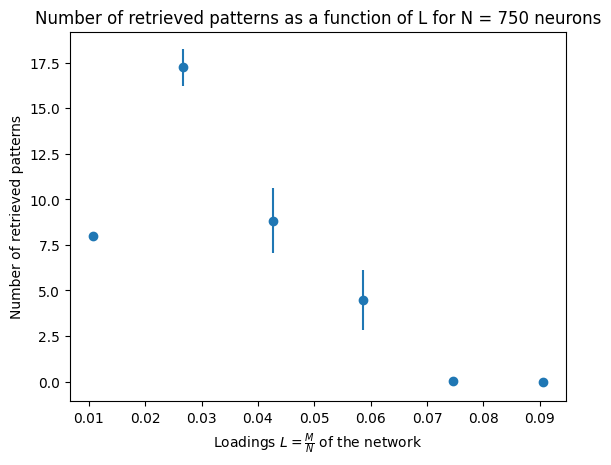

> Computing capacity for N = 800, N_I = 168 and K = 126...
>> Computing M=9 value for N=800
>> Computing M=22 value for N=800
>> Computing M=35 value for N=800
>> Computing M=48 value for N=800
>> Computing M=61 value for N=800
>> Computing M=74 value for N=800


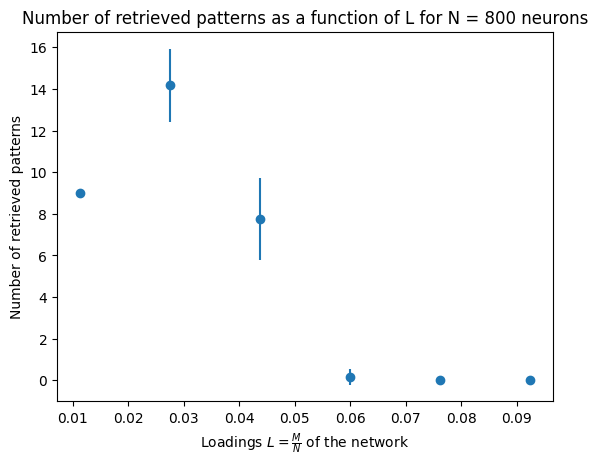

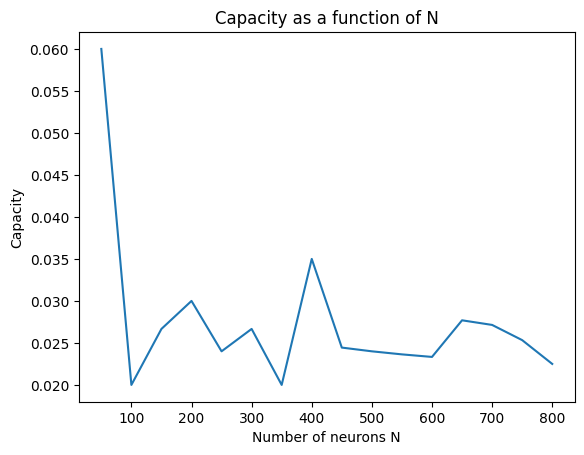

In [11]:
reload(helper_functions_ex3)
import numpy as np
from helper_functions_ex3 import study_capacity

N_values = np.arange(50, 801, 50)
N_I_values, K_values = [], []
cst["K"] = 60
cst["N"] = 300 + 80
cst["N_I"] = 80

for N in N_values:
    N_I_values.append(int(cst["N_I"]/cst["N"] * N)) # Keep the ratio N_I/N = 80/300 = 4/15 constant.
    K_values.append(int(cst["K"]/cst["N"] * N)) # Keep the ratio K/N constant.

N_values, capacities = study_capacity(cst, N_values, N_I_values, K_values, prev_capacity=capacity, function_name="sync")

>> Computing M=5 value for N=380
>> Computing M=6 value for N=380
>> Computing M=7 value for N=380
>> Computing M=8 value for N=380
>> Computing M=9 value for N=380
>> Computing M=10 value for N=380
>> Computing M=11 value for N=380
>> Computing M=12 value for N=380
>> Computing M=13 value for N=380
>> Computing M=14 value for N=380
>> Computing M=15 value for N=380
>> Computing M=16 value for N=380
>> Computing M=17 value for N=380
>> Computing M=18 value for N=380
>> Computing M=19 value for N=380
>> Computing M=20 value for N=380
>> Computing M=21 value for N=380
>> Computing M=22 value for N=380
>> Computing M=23 value for N=380
>> Computing M=24 value for N=380


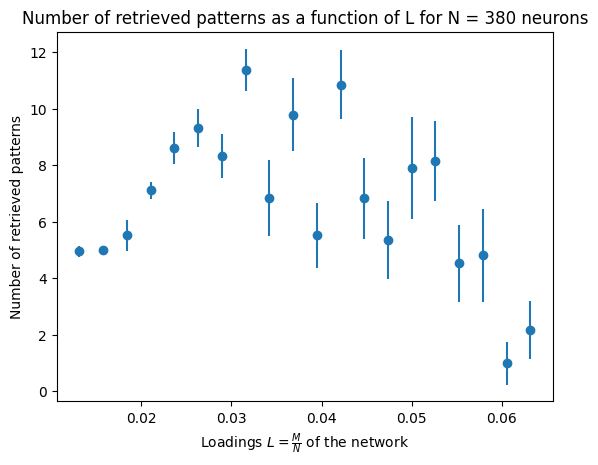

In [12]:
reload(helper_functions_ex3)
import numpy as np
from helper_functions_ex3 import study_simple_capacity

# Find the capacity for N = 300 as in question 1.6

cst["N"] = 300 + 80
cst["N_I"] = 80
cst["K"] = 60
cst["nr_flips"] = int(0.05 * cst["N"])
cst["c_f"] = 0.05                           
cst["T"] = 50
cst["nr_iter"] = 100
M_values = np.arange(5, 25, 1)

capacity = study_simple_capacity(cst, M_values, function_name="seq")

In [13]:
print(capacity)

0.03684210526315789


> Computing capacity for N = 50, N_I = 10 and K = 7...
>> Computing M=1 value for N=50
>> Computing M=2 value for N=50
>> Computing M=3 value for N=50


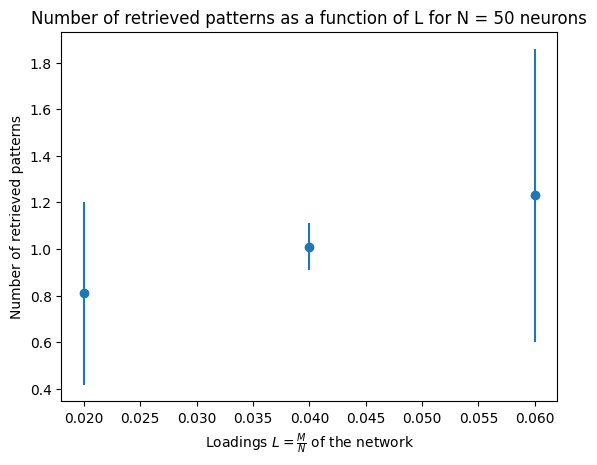

> Computing capacity for N = 100, N_I = 21 and K = 15...
>> Computing M=1 value for N=100
>> Computing M=3 value for N=100
>> Computing M=5 value for N=100
>> Computing M=7 value for N=100


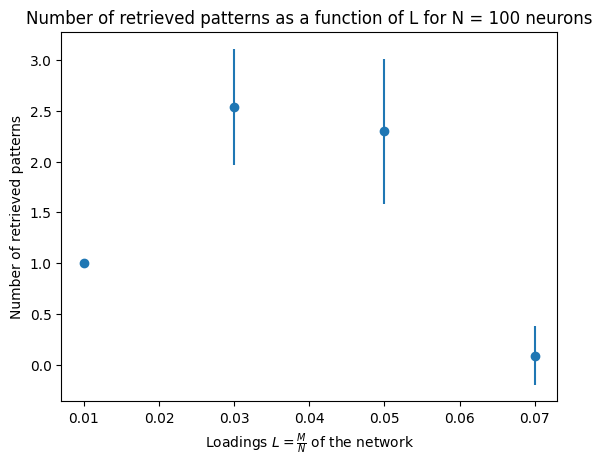

> Computing capacity for N = 150, N_I = 31 and K = 23...
>> Computing M=2 value for N=150
>> Computing M=4 value for N=150
>> Computing M=6 value for N=150
>> Computing M=8 value for N=150
>> Computing M=10 value for N=150
>> Computing M=12 value for N=150


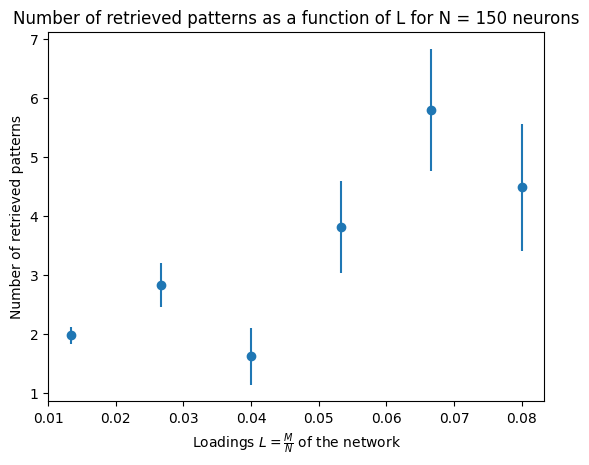

> Computing capacity for N = 200, N_I = 42 and K = 31...
>> Computing M=3 value for N=200
>> Computing M=6 value for N=200
>> Computing M=9 value for N=200
>> Computing M=12 value for N=200
>> Computing M=15 value for N=200


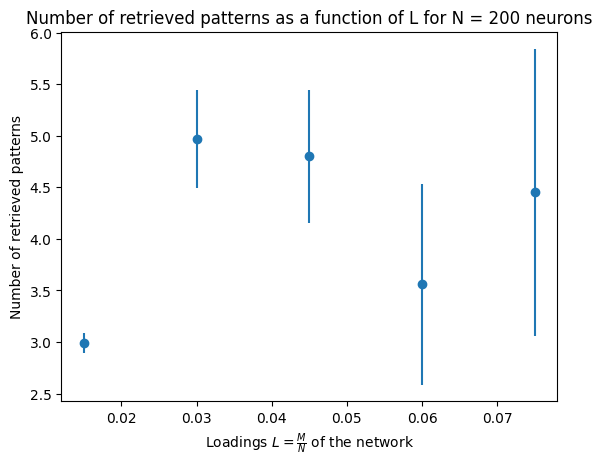

> Computing capacity for N = 250, N_I = 52 and K = 39...
>> Computing M=1 value for N=250
>> Computing M=5 value for N=250
>> Computing M=9 value for N=250
>> Computing M=13 value for N=250
>> Computing M=17 value for N=250
>> Computing M=21 value for N=250


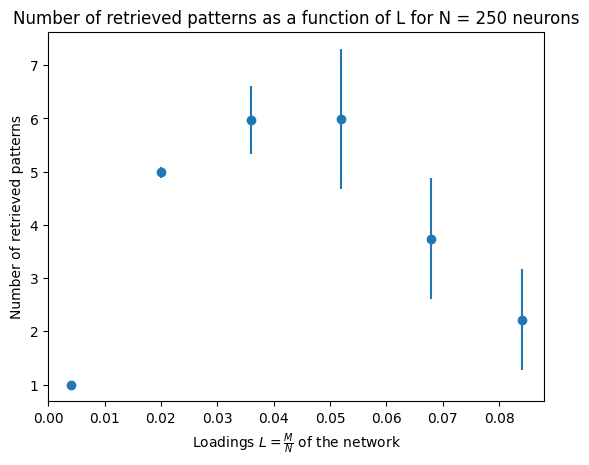

> Computing capacity for N = 300, N_I = 63 and K = 47...
>> Computing M=1 value for N=300
>> Computing M=6 value for N=300
>> Computing M=11 value for N=300
>> Computing M=16 value for N=300
>> Computing M=21 value for N=300


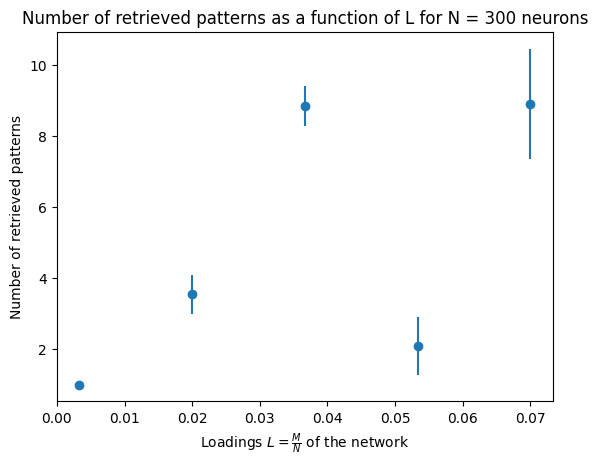

> Computing capacity for N = 350, N_I = 73 and K = 55...
>> Computing M=1 value for N=350
>> Computing M=7 value for N=350
>> Computing M=13 value for N=350
>> Computing M=19 value for N=350
>> Computing M=25 value for N=350


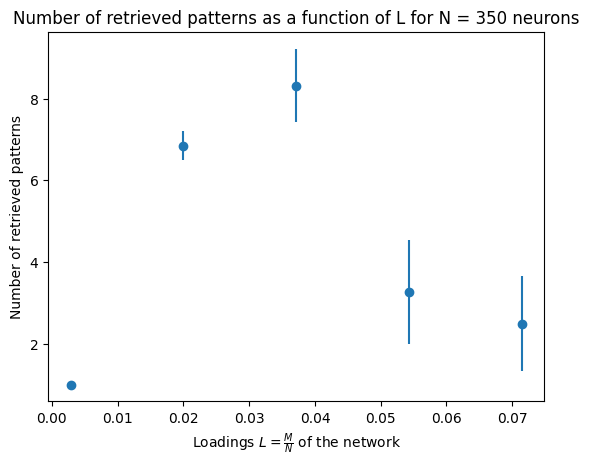

> Computing capacity for N = 400, N_I = 84 and K = 63...
>> Computing M=2 value for N=400
>> Computing M=9 value for N=400
>> Computing M=16 value for N=400
>> Computing M=23 value for N=400
>> Computing M=30 value for N=400


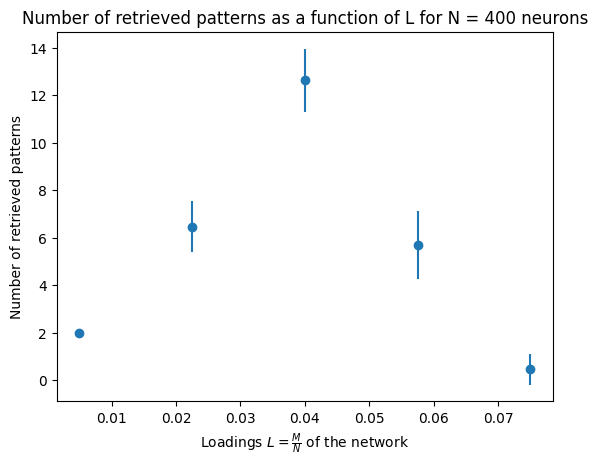

> Computing capacity for N = 450, N_I = 94 and K = 71...
>> Computing M=2 value for N=450
>> Computing M=10 value for N=450
>> Computing M=18 value for N=450
>> Computing M=26 value for N=450
>> Computing M=34 value for N=450


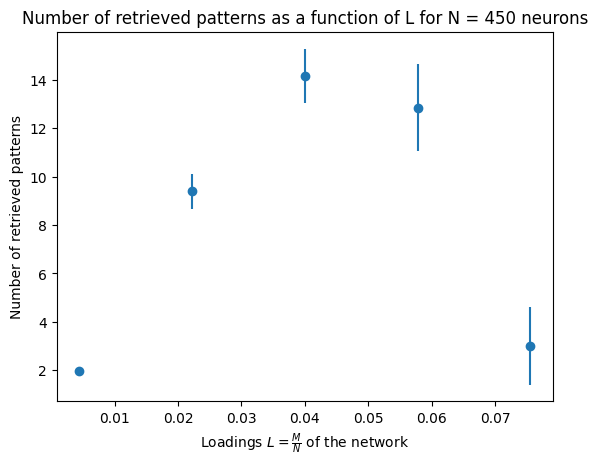

> Computing capacity for N = 500, N_I = 105 and K = 78...
>> Computing M=1 value for N=500
>> Computing M=9 value for N=500
>> Computing M=17 value for N=500
>> Computing M=25 value for N=500
>> Computing M=33 value for N=500
>> Computing M=41 value for N=500


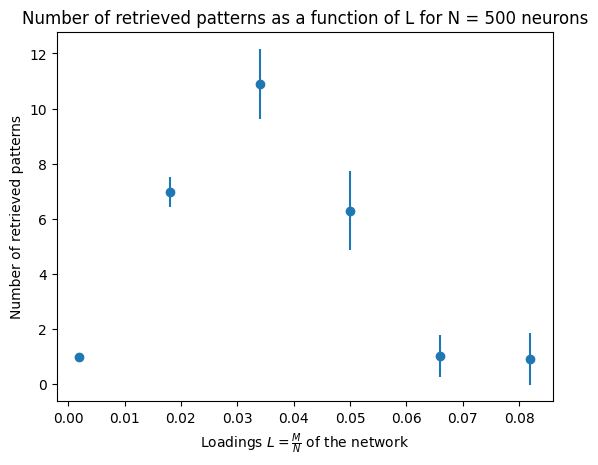

> Computing capacity for N = 550, N_I = 115 and K = 86...
>> Computing M=2 value for N=550
>> Computing M=11 value for N=550
>> Computing M=20 value for N=550
>> Computing M=29 value for N=550
>> Computing M=38 value for N=550
>> Computing M=47 value for N=550


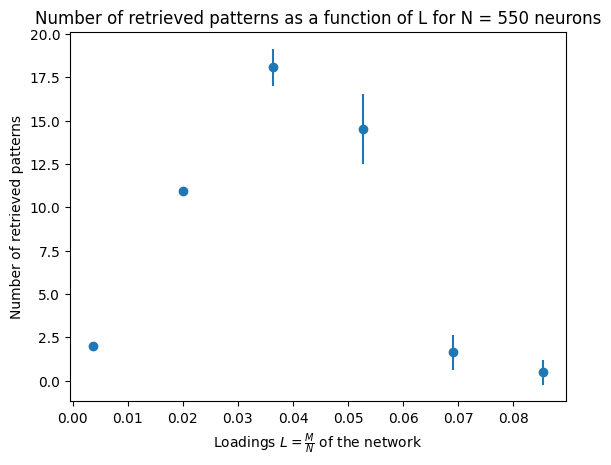

> Computing capacity for N = 600, N_I = 126 and K = 94...
>> Computing M=2 value for N=600
>> Computing M=12 value for N=600
>> Computing M=22 value for N=600
>> Computing M=32 value for N=600
>> Computing M=42 value for N=600


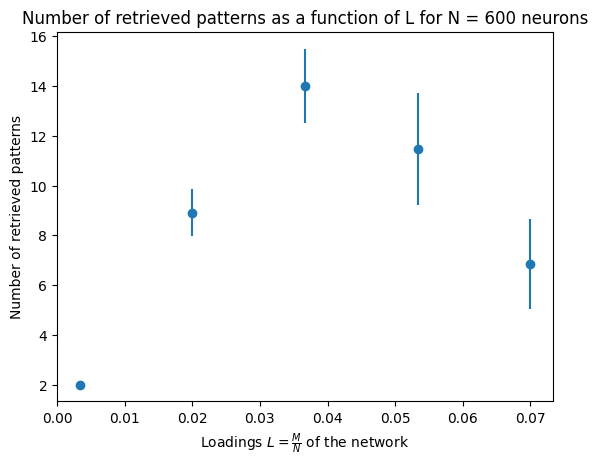

> Computing capacity for N = 650, N_I = 136 and K = 102...
>> Computing M=2 value for N=650
>> Computing M=13 value for N=650
>> Computing M=24 value for N=650
>> Computing M=35 value for N=650
>> Computing M=46 value for N=650


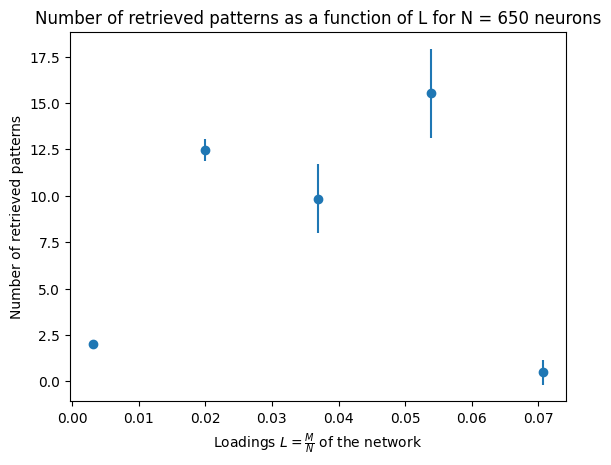

> Computing capacity for N = 700, N_I = 147 and K = 110...
>> Computing M=3 value for N=700
>> Computing M=15 value for N=700
>> Computing M=27 value for N=700
>> Computing M=39 value for N=700
>> Computing M=51 value for N=700


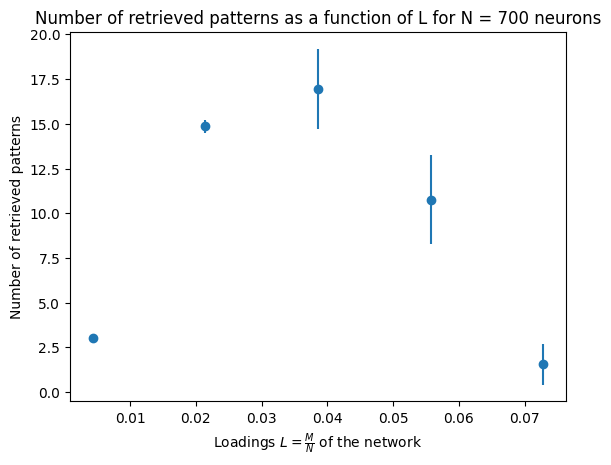

> Computing capacity for N = 750, N_I = 157 and K = 118...
>> Computing M=2 value for N=750
>> Computing M=14 value for N=750
>> Computing M=26 value for N=750
>> Computing M=38 value for N=750
>> Computing M=50 value for N=750
>> Computing M=62 value for N=750


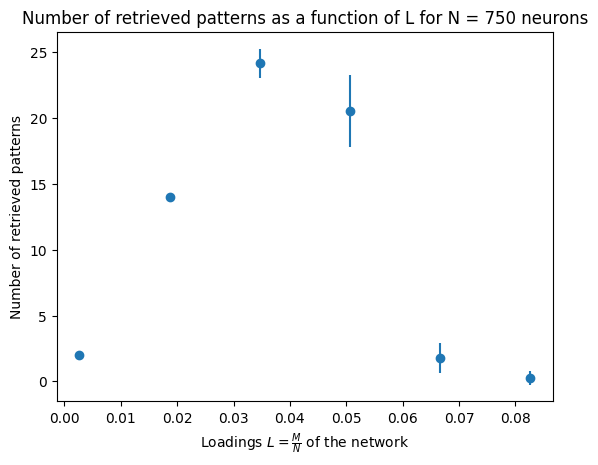

> Computing capacity for N = 800, N_I = 168 and K = 126...
>> Computing M=2 value for N=800
>> Computing M=15 value for N=800
>> Computing M=28 value for N=800
>> Computing M=41 value for N=800
>> Computing M=54 value for N=800
>> Computing M=67 value for N=800


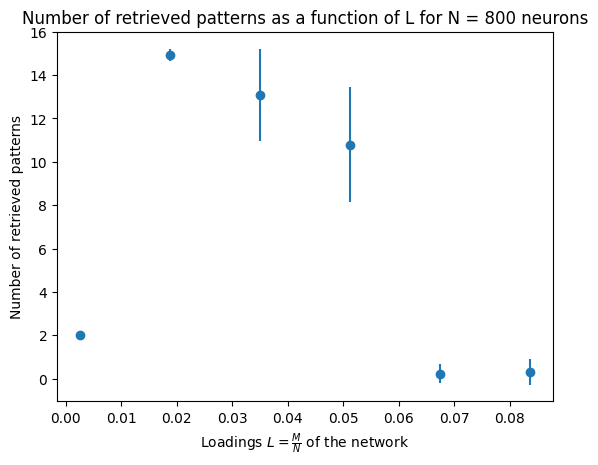

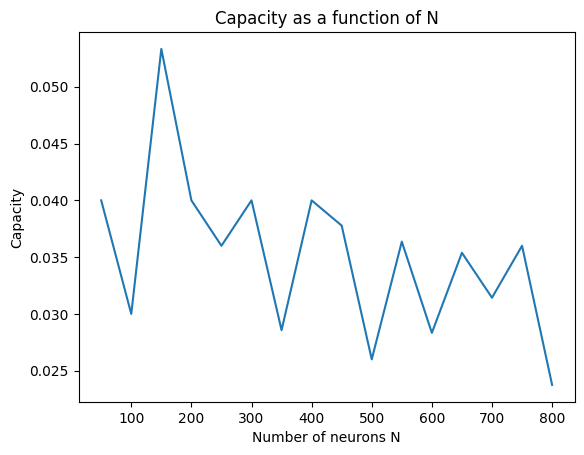

In [14]:
reload(helper_functions_ex3)
# Same for the sequencial update:
N_values = np.arange(50, 801, 50)
N_I_values, K_values = [], []

for N in N_values:
    N_I_values.append(int(cst["N_I"]/cst["N"] * N)) # Keep the ratio N_I/N = 80/300 = 4/15 constant.
    K_values.append(int(cst["K"]/cst["N"] * N)) # Keep the ratio K/N constant.

N_values, capacities = study_capacity(cst, N_values, N_I_values, K_values, prev_capacity=capacity, function_name="seq")

## Ex 3.4

Second inhibitory population. We now add a second inhibitory population of the same size to the network. Neurons of this population can only get activated when the mean activity of the excitatory neurons $\frac{1}{N_E} \sum_i \sigma_i^E$ exceeds $a$; and they project homogeneously to all excitatory neurons with weights $W_{ik}^{E \leftarrow I_2} = \frac{ca}{N_{I_2}}$.

Apart from that, their input weights from excitatory neurons and their activation dynamics have the same properties as the first inhibitory population.

Consider $N_{I_1} = N_{I_2} = N_I$ and $K_1 = K_2 = K$

Repeat question 3.3 with this model. Does the second inhibitory population improve the capacity?
$$
P \{ \sigma_i^{I_2}(t) = 1 | h_k^{I_2}(t), \frac{1}{N_E} \sum_{i=1}^{N_{E}} \sigma_i^{E}(t) > a \} = h_k^{I_2}(t)
$$
$$
h_i^E(t) = \sum_{j=1}^{N_E} W_{ij}^{E \leftarrow E} \sigma_j^E(t) - \sum_{k=1}^{N_I} W_{ik}^{E \leftarrow I_1} \sigma_k^{I_1}(t) - \sum_{k=1}^{N_I} W_{ik}^{E \leftarrow I_2} \sigma_k^{I_2}(t)
$$
$$
h_i^E(t) = -ca \left( \frac{1}{N_I} \sum_{k=1}^{N_I} \sigma_k^{I_2}(t) \right) + \sum_{\mu=1}^M \xi_i^{\mu} \left[ m^{\mu}_{E \leftarrow E} - ca \left( \frac{1}{N_I} \sum_{k=1}^{N_I} \sigma_k^{I_1}(t) \right) \right]
$$
$$
h_k^{I_2}(t) = \sum_{i \in \mathcal{K_2}(k)} W_{ik}^{I_2 \leftarrow E} \sigma_i^E(t) = \sum_{i \in \mathcal{K_2}(k)} \frac{1}{K} \sigma_i^E(t)
$$

To simulate this model, the model will use a population of inhibitory neurons twice bigger $N_I$ and (as weights are not really used in this exercise), only modify the function for one iteration of the model such that the inhibitory population is divided by two ($N_{I_1}$ being the first half and $N_{I_2}$ the second). The equations above are then used, both in a sequential and synced manner.

>> Computing M=5 value for N=460
>> Computing M=6 value for N=460
>> Computing M=7 value for N=460
>> Computing M=8 value for N=460
>> Computing M=9 value for N=460
>> Computing M=10 value for N=460
>> Computing M=11 value for N=460
>> Computing M=12 value for N=460
>> Computing M=13 value for N=460
>> Computing M=14 value for N=460
>> Computing M=15 value for N=460
>> Computing M=16 value for N=460
>> Computing M=17 value for N=460
>> Computing M=18 value for N=460
>> Computing M=19 value for N=460
>> Computing M=20 value for N=460
>> Computing M=21 value for N=460
>> Computing M=22 value for N=460
>> Computing M=23 value for N=460
>> Computing M=24 value for N=460


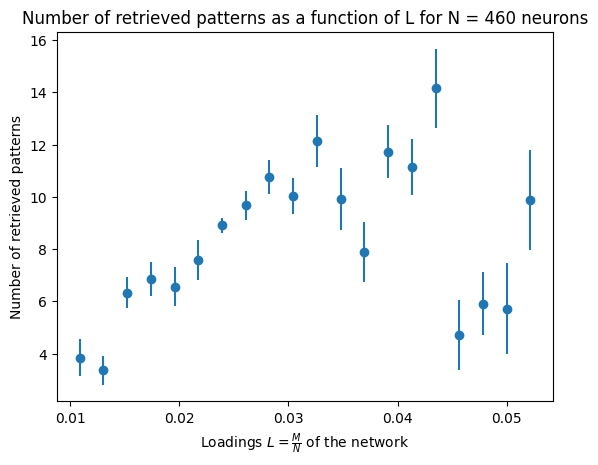

In [16]:
reload(helper_functions_ex3)
# Find the capacity for N = 300 as in question 1.6

cst["N"] = 300 + 80*2
cst["N_I"] = 80 * 2
cst["K"] = 60
cst["nr_flips"] = int(0.05 * cst["N"])
cst["c_f"] = 0.05                           
cst["T"] = 50
cst["nr_iter"] = 15
M_values = np.arange(5, 25, 1)

capacity = study_simple_capacity(cst, M_values, function_name="sync_2inhib")

In [17]:
print(capacity)

0.0391304347826087


> Computing capacity for N = 50, N_I = 17 and K = 6...
>> Computing M=1 value for N=50
>> Computing M=2 value for N=50
>> Computing M=3 value for N=50


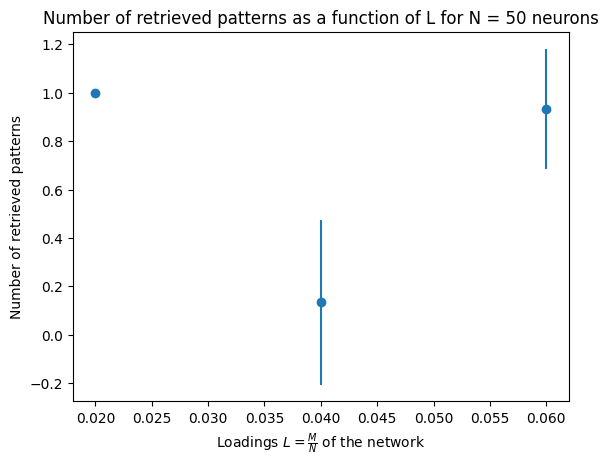

> Computing capacity for N = 100, N_I = 34 and K = 13...
>> Computing M=1 value for N=100
>> Computing M=3 value for N=100
>> Computing M=5 value for N=100
>> Computing M=7 value for N=100


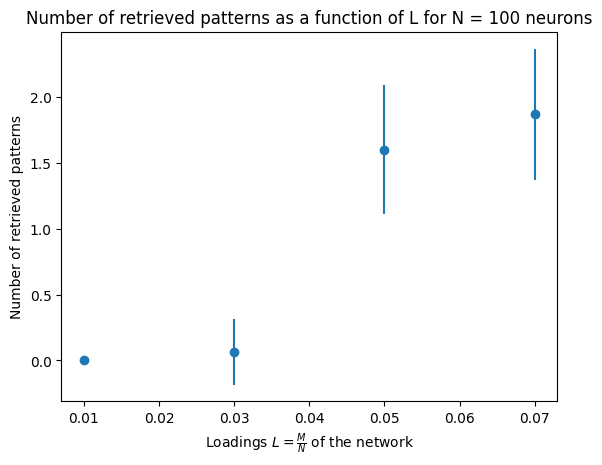

> Computing capacity for N = 150, N_I = 52 and K = 19...
>> Computing M=2 value for N=150
>> Computing M=4 value for N=150
>> Computing M=6 value for N=150
>> Computing M=8 value for N=150
>> Computing M=10 value for N=150
>> Computing M=12 value for N=150


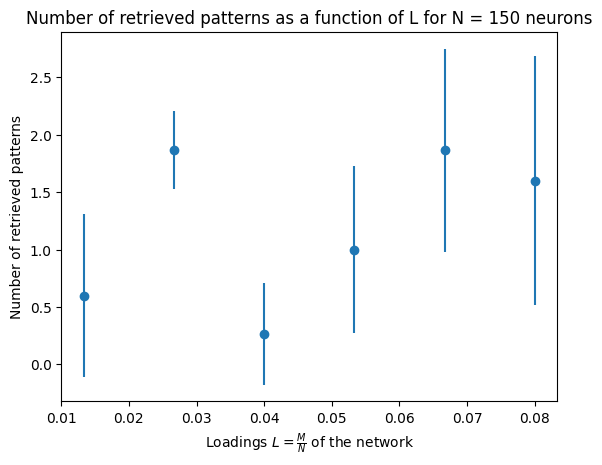

> Computing capacity for N = 200, N_I = 69 and K = 26...
>> Computing M=1 value for N=200
>> Computing M=4 value for N=200
>> Computing M=7 value for N=200
>> Computing M=10 value for N=200
>> Computing M=13 value for N=200
>> Computing M=16 value for N=200


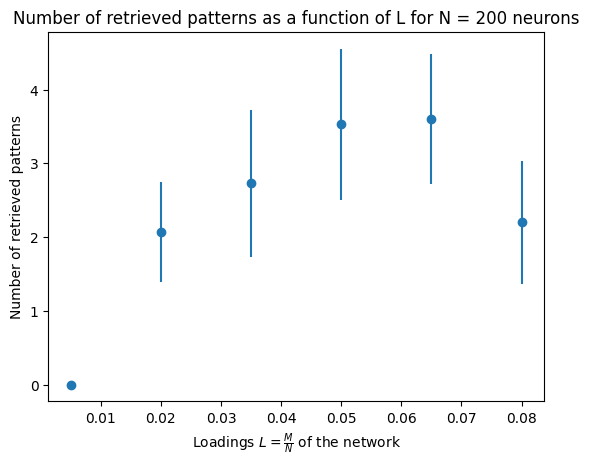

> Computing capacity for N = 250, N_I = 86 and K = 32...
>> Computing M=1 value for N=250
>> Computing M=5 value for N=250
>> Computing M=9 value for N=250
>> Computing M=13 value for N=250
>> Computing M=17 value for N=250
>> Computing M=21 value for N=250


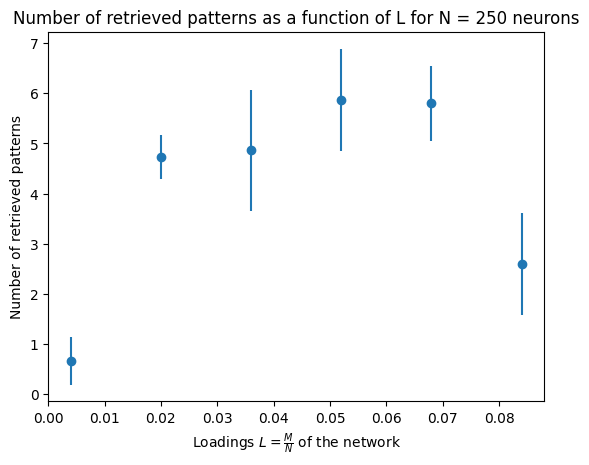

> Computing capacity for N = 300, N_I = 104 and K = 39...
>> Computing M=2 value for N=300
>> Computing M=7 value for N=300
>> Computing M=12 value for N=300
>> Computing M=17 value for N=300
>> Computing M=22 value for N=300


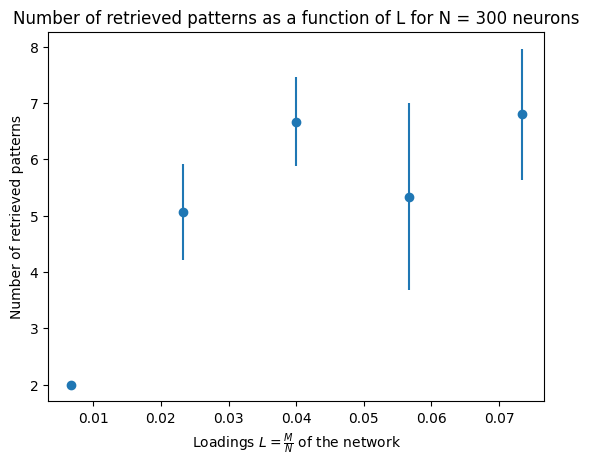

> Computing capacity for N = 350, N_I = 121 and K = 45...
>> Computing M=2 value for N=350
>> Computing M=8 value for N=350
>> Computing M=14 value for N=350
>> Computing M=20 value for N=350
>> Computing M=26 value for N=350


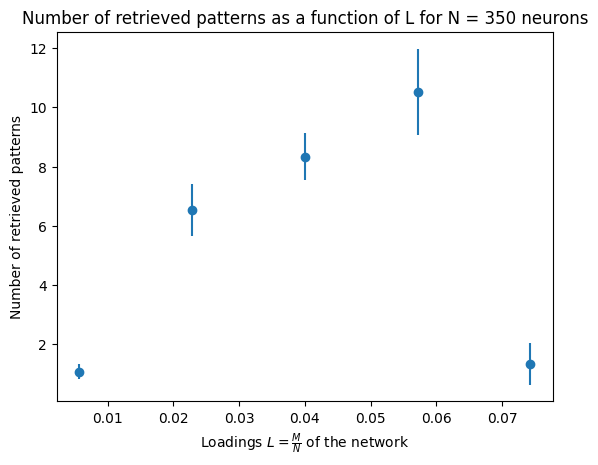

> Computing capacity for N = 400, N_I = 139 and K = 52...
>> Computing M=3 value for N=400
>> Computing M=10 value for N=400
>> Computing M=17 value for N=400
>> Computing M=24 value for N=400
>> Computing M=31 value for N=400


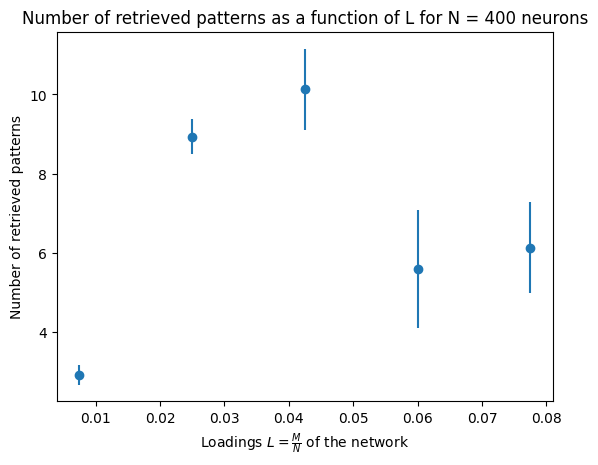

> Computing capacity for N = 450, N_I = 156 and K = 58...
>> Computing M=3 value for N=450
>> Computing M=11 value for N=450
>> Computing M=19 value for N=450
>> Computing M=27 value for N=450
>> Computing M=35 value for N=450


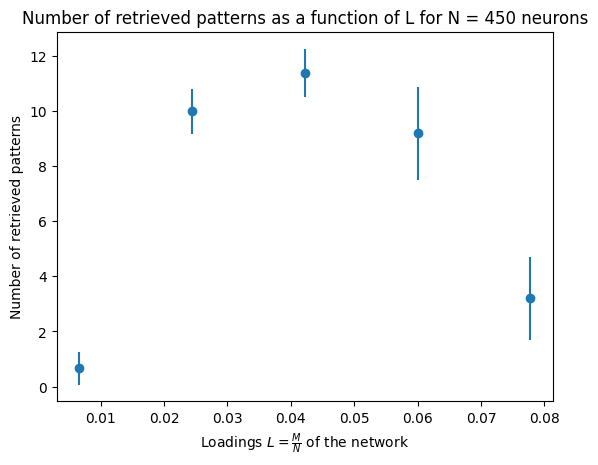

> Computing capacity for N = 500, N_I = 173 and K = 65...
>> Computing M=3 value for N=500
>> Computing M=11 value for N=500
>> Computing M=19 value for N=500
>> Computing M=27 value for N=500
>> Computing M=35 value for N=500
>> Computing M=43 value for N=500


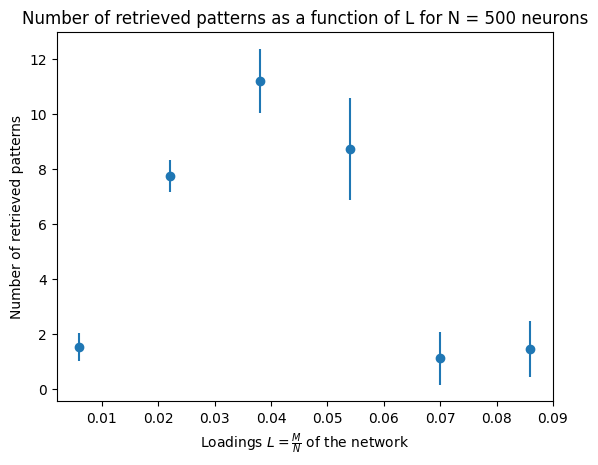

> Computing capacity for N = 550, N_I = 191 and K = 71...
>> Computing M=3 value for N=550
>> Computing M=12 value for N=550
>> Computing M=21 value for N=550
>> Computing M=30 value for N=550
>> Computing M=39 value for N=550
>> Computing M=48 value for N=550


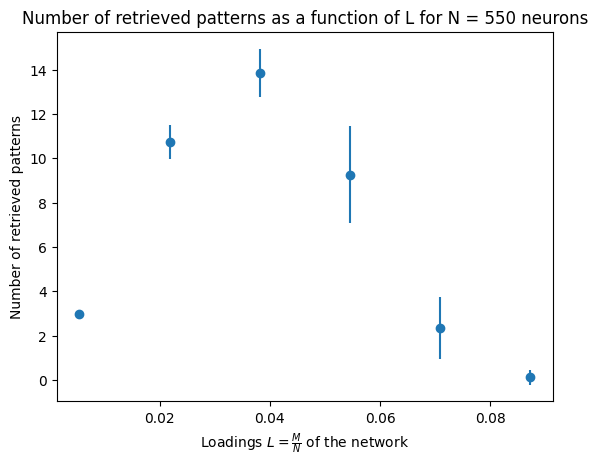

> Computing capacity for N = 600, N_I = 208 and K = 78...
>> Computing M=3 value for N=600
>> Computing M=13 value for N=600
>> Computing M=23 value for N=600
>> Computing M=33 value for N=600
>> Computing M=43 value for N=600


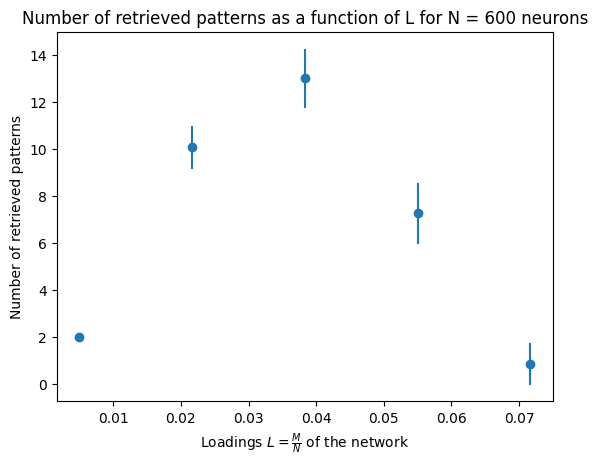

> Computing capacity for N = 650, N_I = 226 and K = 84...
>> Computing M=4 value for N=650
>> Computing M=15 value for N=650
>> Computing M=26 value for N=650
>> Computing M=37 value for N=650
>> Computing M=48 value for N=650


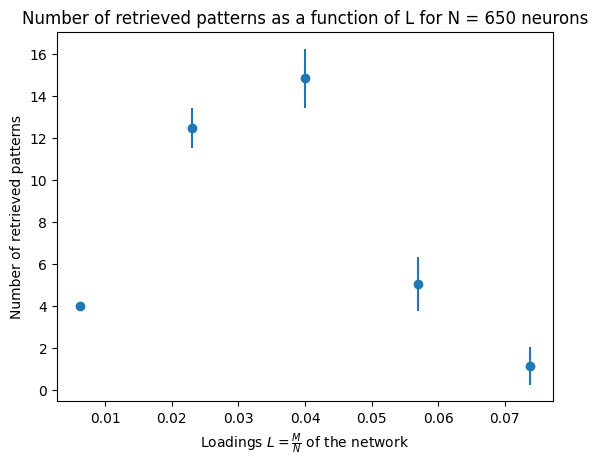

> Computing capacity for N = 700, N_I = 243 and K = 91...
>> Computing M=4 value for N=700
>> Computing M=16 value for N=700
>> Computing M=28 value for N=700
>> Computing M=40 value for N=700
>> Computing M=52 value for N=700


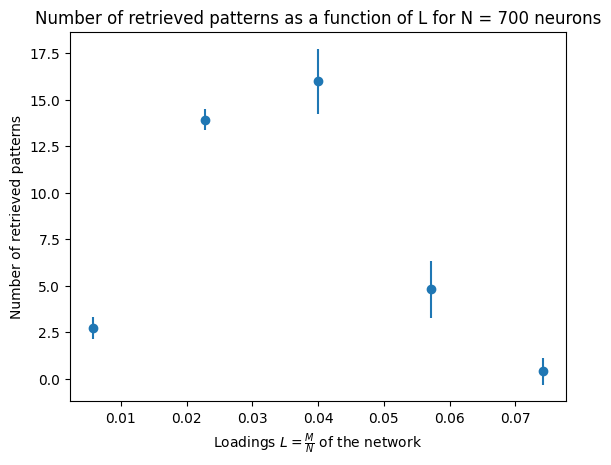

> Computing capacity for N = 750, N_I = 260 and K = 97...
>> Computing M=4 value for N=750
>> Computing M=16 value for N=750
>> Computing M=28 value for N=750
>> Computing M=40 value for N=750
>> Computing M=52 value for N=750
>> Computing M=64 value for N=750


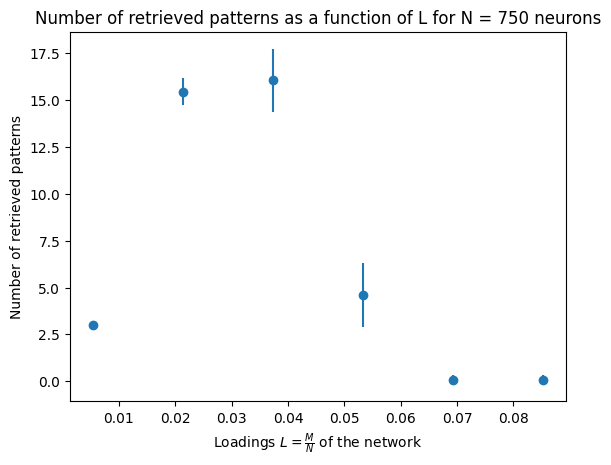

> Computing capacity for N = 800, N_I = 278 and K = 104...
>> Computing M=4 value for N=800
>> Computing M=17 value for N=800
>> Computing M=30 value for N=800
>> Computing M=43 value for N=800
>> Computing M=56 value for N=800
>> Computing M=69 value for N=800


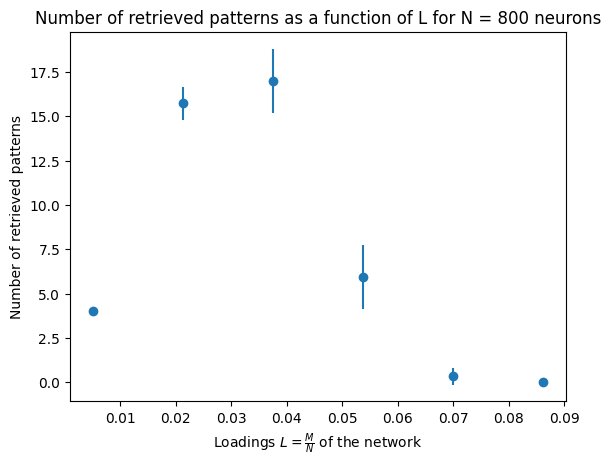

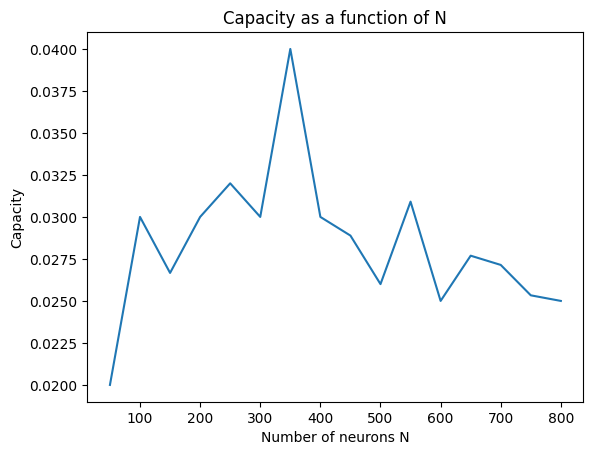

In [41]:
reload(helper_functions_ex3)
N_values = np.arange(50, 801, 50)
cst["N"] = 300 + 80*2
cst["N_I"] = 80 * 2
cst["K"] = 60
cst["nr_iter"] = 15

N_I_values, K_values = [], []

for N in N_values:
    N_I_values.append(int(cst["N_I"]/cst["N"] * N)) # Keep the ratio N_I/N = 80/300 = 4/15 constant.
    K_values.append(int(cst["K"]/cst["N"] * N)) # Keep the ratio K/N constant.

N_values, capacities = study_capacity(cst, N_values, N_I_values, K_values, prev_capacity=capacity, function_name="sync_2inhib")

>> Computing M=5 value for N=460
>> Computing M=6 value for N=460
>> Computing M=7 value for N=460
>> Computing M=8 value for N=460
>> Computing M=9 value for N=460
>> Computing M=10 value for N=460
>> Computing M=11 value for N=460
>> Computing M=12 value for N=460
>> Computing M=13 value for N=460
>> Computing M=14 value for N=460
>> Computing M=15 value for N=460
>> Computing M=16 value for N=460
>> Computing M=17 value for N=460
>> Computing M=18 value for N=460
>> Computing M=19 value for N=460
>> Computing M=20 value for N=460
>> Computing M=21 value for N=460
>> Computing M=22 value for N=460
>> Computing M=23 value for N=460
>> Computing M=24 value for N=460


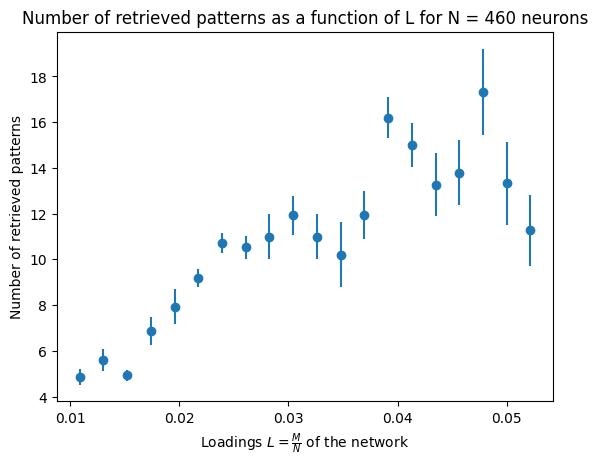

In [42]:
# Find the capacity for N = 300 as in question 1.6

cst["N"] = 300 + 80*2
cst["N_I"] = 80 * 2
cst["K"] = 60
cst["nr_flips"] = int(0.05 * cst["N"])
cst["c_f"] = 0.05                           
cst["T"] = 50
cst["nr_iter"] = 15
M_values = np.arange(5, 25, 1)

capacity = study_simple_capacity(cst, M_values, function_name="seq_2inhib")

In [43]:
print(capacity)

0.043478260869565216


> Computing capacity for N = 50, N_I = 17 and K = 6...
>> Computing M=1 value for N=50
>> Computing M=2 value for N=50
>> Computing M=3 value for N=50
>> Computing M=4 value for N=50


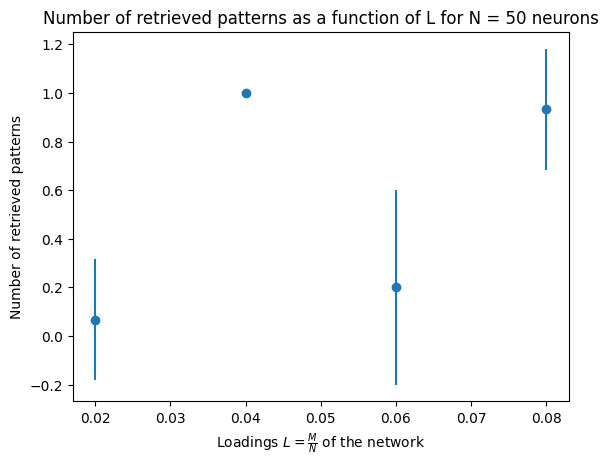

> Computing capacity for N = 100, N_I = 34 and K = 13...
>> Computing M=1 value for N=100
>> Computing M=3 value for N=100
>> Computing M=5 value for N=100
>> Computing M=7 value for N=100


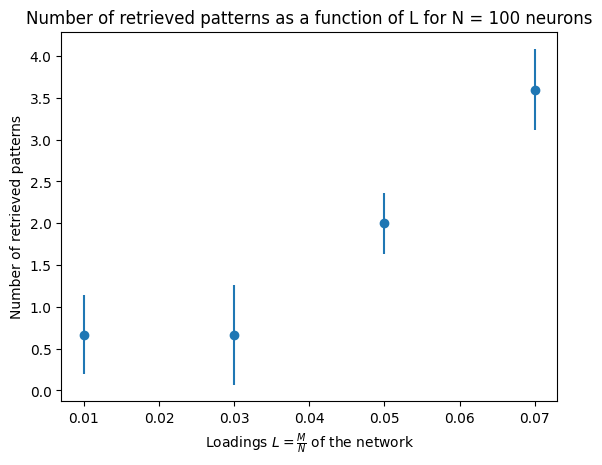

> Computing capacity for N = 150, N_I = 52 and K = 19...
>> Computing M=1 value for N=150
>> Computing M=3 value for N=150
>> Computing M=5 value for N=150
>> Computing M=7 value for N=150
>> Computing M=9 value for N=150
>> Computing M=11 value for N=150
>> Computing M=13 value for N=150


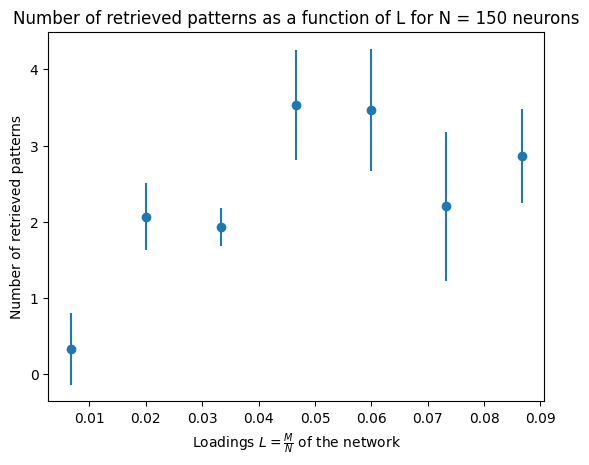

> Computing capacity for N = 200, N_I = 69 and K = 26...
>> Computing M=2 value for N=200
>> Computing M=5 value for N=200
>> Computing M=8 value for N=200
>> Computing M=11 value for N=200
>> Computing M=14 value for N=200
>> Computing M=17 value for N=200


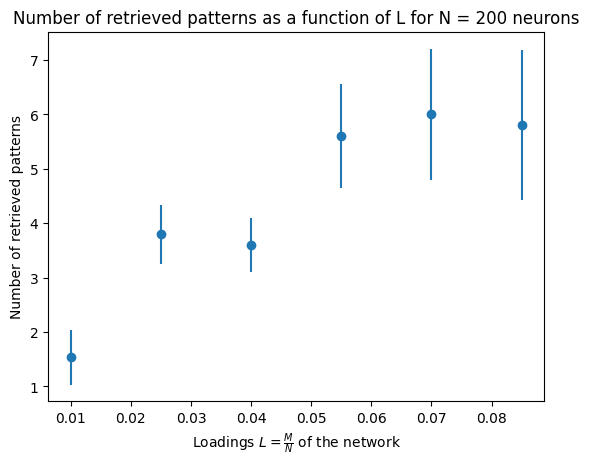

> Computing capacity for N = 250, N_I = 86 and K = 32...
>> Computing M=2 value for N=250
>> Computing M=6 value for N=250
>> Computing M=10 value for N=250
>> Computing M=14 value for N=250
>> Computing M=18 value for N=250
>> Computing M=22 value for N=250


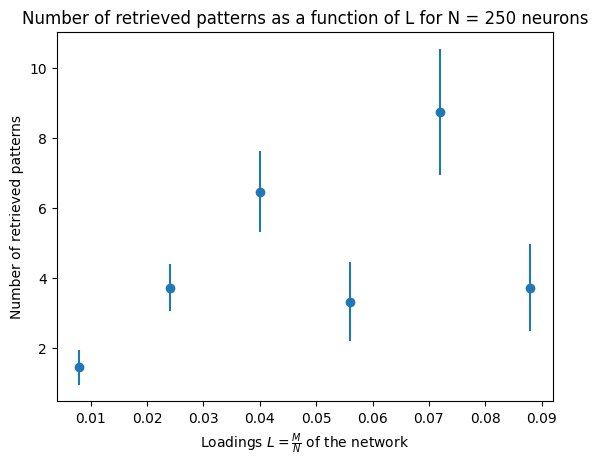

> Computing capacity for N = 300, N_I = 104 and K = 39...
>> Computing M=3 value for N=300
>> Computing M=8 value for N=300
>> Computing M=13 value for N=300
>> Computing M=18 value for N=300
>> Computing M=23 value for N=300


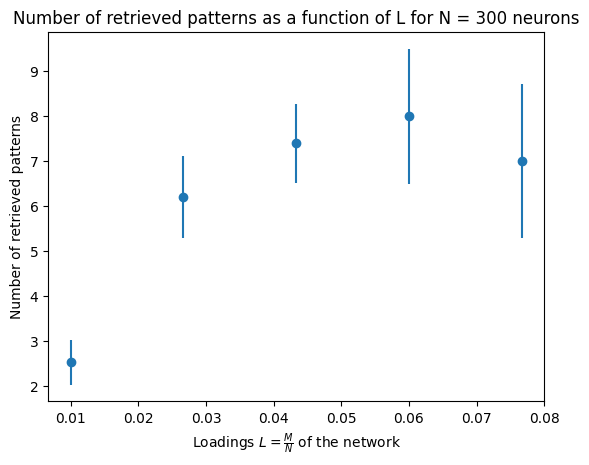

> Computing capacity for N = 350, N_I = 121 and K = 45...
>> Computing M=4 value for N=350
>> Computing M=10 value for N=350
>> Computing M=16 value for N=350
>> Computing M=22 value for N=350
>> Computing M=28 value for N=350


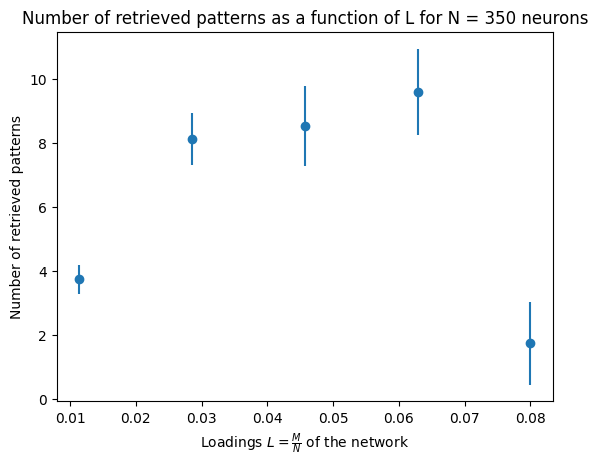

> Computing capacity for N = 400, N_I = 139 and K = 52...
>> Computing M=4 value for N=400
>> Computing M=11 value for N=400
>> Computing M=18 value for N=400
>> Computing M=25 value for N=400
>> Computing M=32 value for N=400


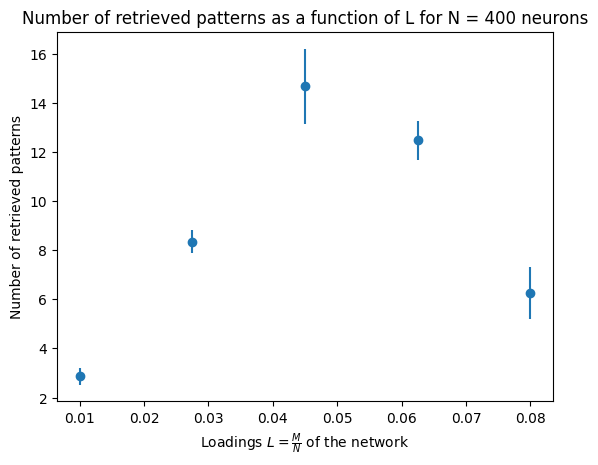

> Computing capacity for N = 450, N_I = 156 and K = 58...
>> Computing M=5 value for N=450
>> Computing M=13 value for N=450
>> Computing M=21 value for N=450
>> Computing M=29 value for N=450
>> Computing M=37 value for N=450


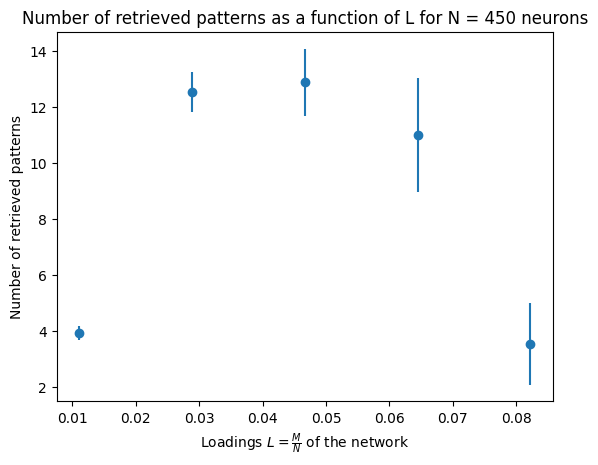

> Computing capacity for N = 500, N_I = 173 and K = 65...
>> Computing M=5 value for N=500
>> Computing M=13 value for N=500
>> Computing M=21 value for N=500
>> Computing M=29 value for N=500
>> Computing M=37 value for N=500
>> Computing M=45 value for N=500


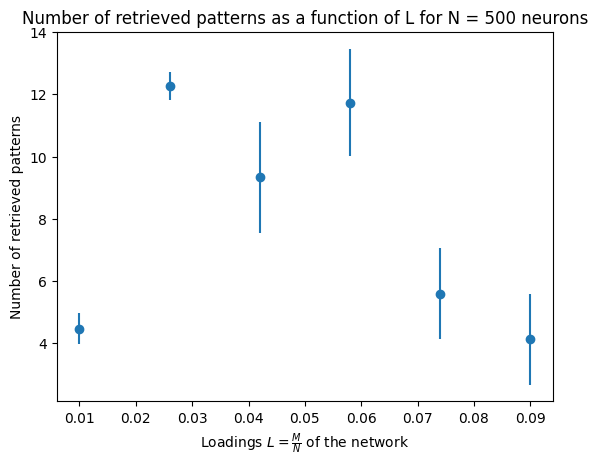

> Computing capacity for N = 550, N_I = 191 and K = 71...
>> Computing M=5 value for N=550
>> Computing M=14 value for N=550
>> Computing M=23 value for N=550
>> Computing M=32 value for N=550
>> Computing M=41 value for N=550
>> Computing M=50 value for N=550


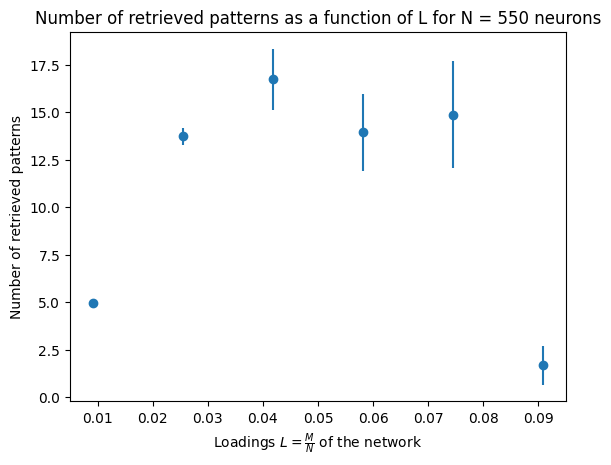

> Computing capacity for N = 600, N_I = 208 and K = 78...
>> Computing M=6 value for N=600
>> Computing M=16 value for N=600
>> Computing M=26 value for N=600
>> Computing M=36 value for N=600
>> Computing M=46 value for N=600


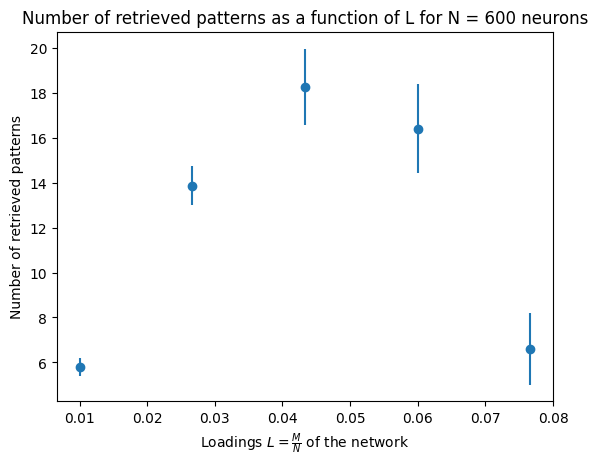

> Computing capacity for N = 650, N_I = 226 and K = 84...
>> Computing M=7 value for N=650
>> Computing M=18 value for N=650
>> Computing M=29 value for N=650
>> Computing M=40 value for N=650
>> Computing M=51 value for N=650


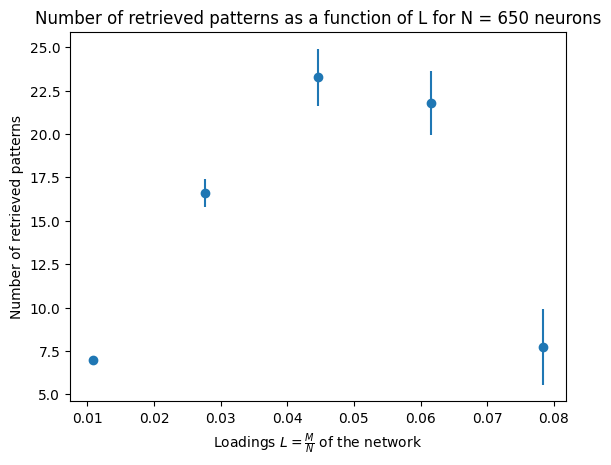

> Computing capacity for N = 700, N_I = 243 and K = 91...
>> Computing M=7 value for N=700
>> Computing M=19 value for N=700
>> Computing M=31 value for N=700
>> Computing M=43 value for N=700
>> Computing M=55 value for N=700


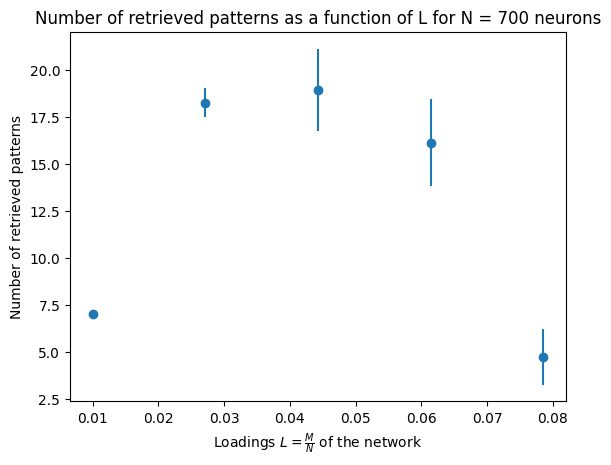

> Computing capacity for N = 750, N_I = 260 and K = 97...
>> Computing M=7 value for N=750
>> Computing M=19 value for N=750
>> Computing M=31 value for N=750
>> Computing M=43 value for N=750
>> Computing M=55 value for N=750
>> Computing M=67 value for N=750


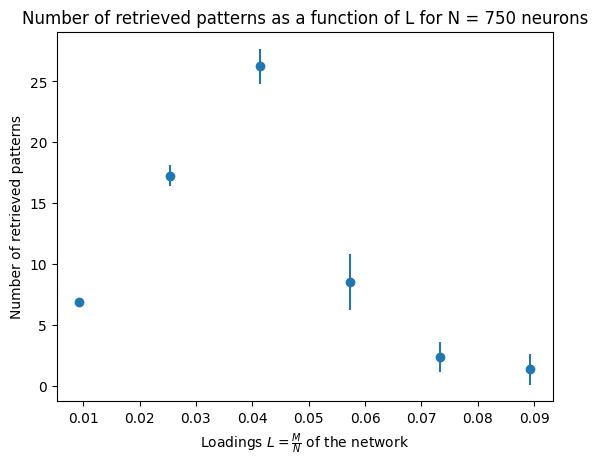

> Computing capacity for N = 800, N_I = 278 and K = 104...
>> Computing M=8 value for N=800
>> Computing M=21 value for N=800
>> Computing M=34 value for N=800
>> Computing M=47 value for N=800
>> Computing M=60 value for N=800
>> Computing M=73 value for N=800


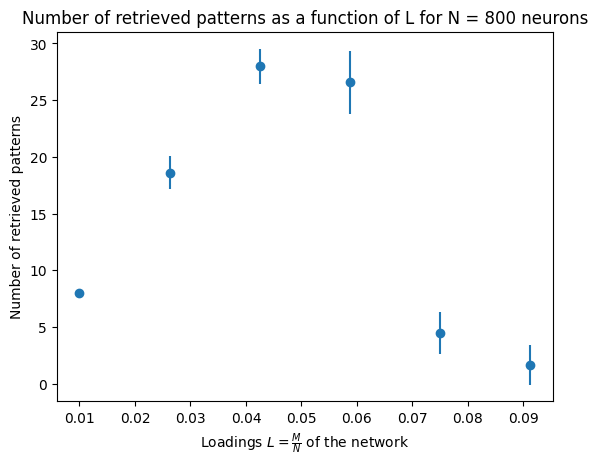

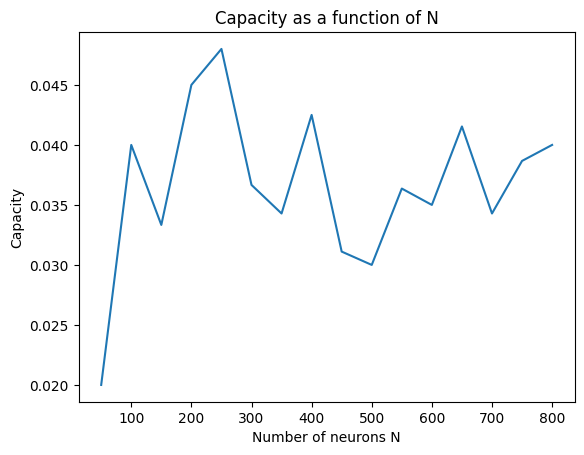

In [44]:
N_values = np.arange(50, 801, 50)
N_I_values, K_values = [], []

for N in N_values:
    N_I_values.append(int(cst["N_I"]/cst["N"] * N)) # Keep the ratio N_I/N = 80/300 = 4/15 constant.
    K_values.append(int(cst["K"]/cst["N"] * N)) # Keep the ratio K/N constant.

N_values, capacities = study_capacity(cst, N_values, N_I_values, K_values, prev_capacity=capacity, function_name="seq_2inhib")

## Ex 3.5

In [45]:
reload(helper_functions_ex3)

cst["N"] = 300 + 80 * 2
cst["N_I"] = 80 * 2
cst["K"] = 60
cst["nr_flips"] = int(0.02 * cst["N"])
cst["c_f"] = 0.02                           
cst["M"] = 10

ext_p = {
    "init_steps": 50,
    "feed_steps": 5,
    "evolve_steps": 50,
    "J": 2,
    "sequence_length": 10
}

cst["T"] = ext_p["init_steps"] + (ext_p["feed_steps"] + ext_p["evolve_steps"]) * ext_p["sequence_length"]


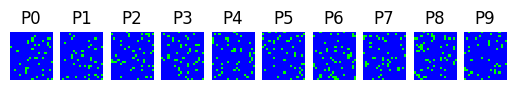

In [46]:
from helper_functions_ex3_states import generate_random_patterns
from neurodynex3.hopfield_network import plot_tools

weights, pattern_list, shape = generate_random_patterns(cst)
plot_tools.plot_pattern_list(pattern_list)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


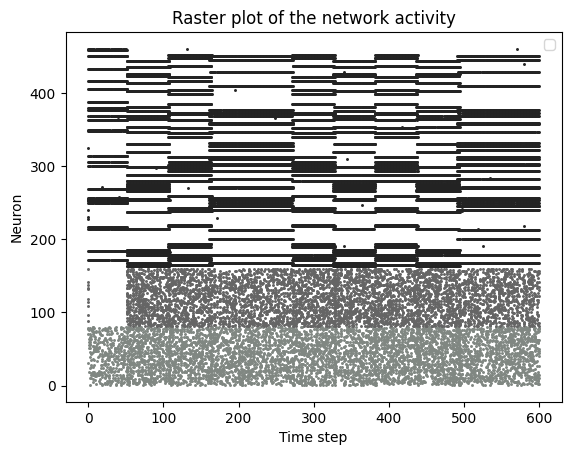

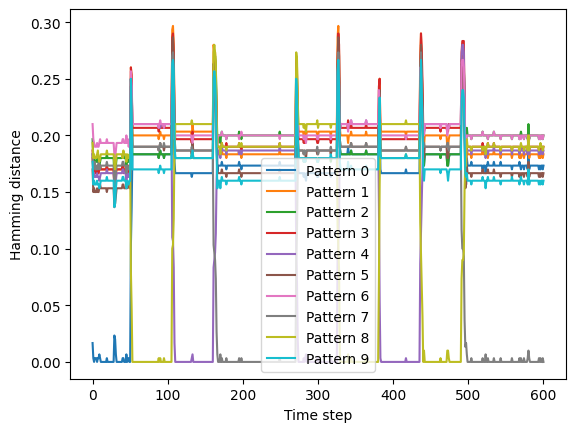

[8, 4, 7, 7, 4, 8, 4, 8, 7, 7]


In [47]:
from helper_functions_ex3 import flip_and_iterate, plot_state_sequence_and_overlap, study_hamming_distances, plot_raster

noisy_init_pattern, sigmas_list, sigmas_list_as_patterns, sigmas_list_ids, full_sigmas_list_as_patterns, patterns_presented = flip_and_iterate(
    cst, shape, pattern_list, init_pattern=0, only_last_state=False, function_name="sync_2inhib", ext_p=ext_p)

# print(len(full_sigmas_list_as_patterns))

# sub_sigmas_list = [sigmas_list_as_patterns[i:i + 8] for i in range(0, len(sigmas_list_as_patterns), 8)]
# sub_sigmas_ids = [sigmas_list_ids[i:i + 8] for i in range(0, len(sigmas_list_ids), 8)]

# for i, s_l_a_p in enumerate(sub_sigmas_list): # s_l_a_p: sigmas_list_as_patterns
#     # plot_tools.plot_pattern_list(s_l_a_p)

#     plot_state_sequence_and_overlap(
#         s_l_a_p, pattern_list, overlap_from=cst["N_I"], ids=sub_sigmas_ids[i], suptitle="Network dynamics with sync. updates and external input")

plot_raster(cst, full_sigmas_list_as_patterns, separations=[round(cst["N_I"]/2), cst["N_I"]])
study_hamming_distances(cst, full_sigmas_list_as_patterns, pattern_list, overlap_from=cst["N_I"])
# study_hamming_distances(cst, full_sigmas_list_as_patterns, pattern_list, overlap_from=cst["N_I"], patterns_ids=[0, 1, 2])
print(patterns_presented)

By plotting the hamming distance against the time, it can be observed that the presented pattern is correctly retrieved after a "hamming distance" spike in less than 5 iterations.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


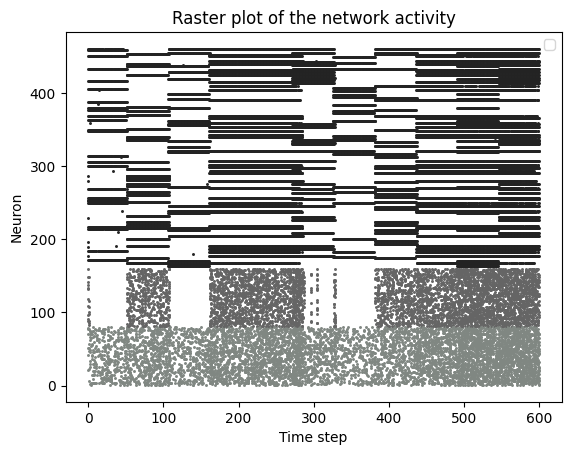

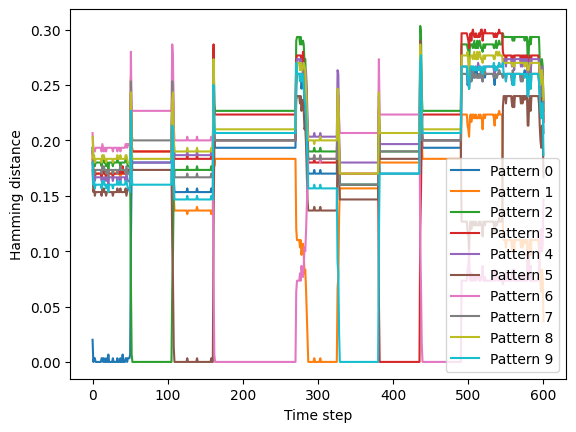

[2, 5, 6, 6, 1, 9, 3, 6, 5, 1]


In [48]:
from helper_functions_ex3 import flip_and_iterate, plot_state_sequence_and_overlap, study_hamming_distances, plot_raster

noisy_init_pattern, sigmas_list, sigmas_list_as_patterns, sigmas_list_ids, full_sigmas_list_as_patterns, patterns_presented = flip_and_iterate(
    cst, shape, pattern_list, init_pattern=0, only_last_state=False, function_name="seq_2inhib", ext_p=ext_p)

# sub_sigmas_list = [sigmas_list_as_patterns[i:i + 8] for i in range(0, len(sigmas_list_as_patterns), 8)]
# sub_sigmas_ids = [sigmas_list_ids[i:i + 8] for i in range(0, len(sigmas_list_ids), 8)]

# for i, s_l_a_p in enumerate(sub_sigmas_list):
#     # plot_tools.plot_pattern_list(s_l_a_p)

#     plot_state_sequence_and_overlap(
#         s_l_a_p, pattern_list, overlap_from=cst["N_I"], ids=sub_sigmas_ids[i], suptitle="Network dynamics with seq. updates and external input")

plot_raster(cst, full_sigmas_list_as_patterns, separations=[round(cst["N_I"]/2), cst["N_I"]])
study_hamming_distances(cst, full_sigmas_list_as_patterns, pattern_list, overlap_from=cst["N_I"])
# study_hamming_distances(cst, full_sigmas_list_as_patterns, pattern_list, overlap_from=cst["N_I"], patterns_ids=[0, 1, 2])
print(patterns_presented)

It makes sense that the pattern has an upper part which is not retrieved (inhibitory neurons) and a bottom part which is retrieved (excitatory neurons).

The hamming distance has some noice at first but as a pattern is presented, the noise strrongly decreases and the presented patterns are much more efficiently retrieved than using a sync. update!